# Ultimate Technologies

## Responses:

**Part 1**
* Highest use days are Sat and Sun
* Monday is the lowest login day
* 
The biggest peak of all tends to be Sunday 3am (130-150 logins
* Next b
Bgestig peakare s around Fri 9pm - Sat 3am and Sat 9pm - Sun 3am (80-130 login
* )
Mon-Fri, peaks around noon (50-80 logins) and smaller peaks around 9pm - midnight (around 40-70 logi
* It seems like logins are frequent during times when a taxi is needed: going out and imbibing (to avoid drinking and driving) on the weekend evenings and coming home from a night out (early morning calls) and some lunch breaks / weekday evenings.  day

**Part 2**
1. Key measure of success of this experiment to encourage driver partners to serve both cities. Why this metric?
2. Design a practical experiment to compare the effectiveness of the proposed change, using the key measure of success. Explain a) how you'd implement the experiment, b) what statistical tests you'd conduct to verify the signifiance of the observation, and c) how you'd interpret the results and provide recommendations to the city operations team. Provide any caveats.
  
* The two cities want to encourage drivers to be available in both cities and have offered to reimburse all toll costs, thus removing a financial barrier for riders and passengers.
* The best way to measure if this experiment would work is to collect data on the locations of the pickup and drop off. There first needs to be a period of time before the toll removal begins for the data to be collected, as well as the same period of time after the change, in order to see if there is a difference caused by the toll removal.
* Data scientists can count how many times a ride was within its own city vs. crossed to the other city. If they notice a signficant shift in the number of rides that cross the bridge into the other city, then they will know that the toll has a large influence on how fluid the residents of these two cities are.
* The null hypothesis is that the tolls do not have any statistical significance on driver partner behavior, and that the number of trips taken between Gotham and Metropolis have not changed significantly.
* First, I'd calculate the average difference in login count and the standard deviation, just to see the absolute change from the before and after, and how much the values tend to deviate.
* Next, I'd calculate the paired t-test value to determine whether or not it is statistically significant: (average differences * sqrt(n) / std).
* I'd also calculate the p-value. If it is less than 0.05, then we reject the null hypothesis and conclude that the tolls DO have an impact on drivers' behavior. s. y

**Part 3**
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided 
data for this analysis (a few sentences/plots describing your approach will suffice). Wha 
fraction of the observed users were retaine
* Make new column for if the trips_in_first_30_days is not 0 ('retained?')
* New column for diff between signup_date and last_trip_date
* Extract the month, date, day of week, and weekend from signup_date and last_trip_date
* Impute missing ratings with the average
* Create histograms and bar graphs to get a bigger picture of the distribution
* 69.22% of users are "retained" (have taken at least 1 trip within 30 days of signing up)
* 

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
* This data is biased because it has not given enough time for users to prove whether or not they'd be active in their 6th month. Since the last signup_day is January 31, I changed the "long term rider" status to be 5 months, since every user had a chance to prove whether or not they'd be active in their 5th month. I indicated which users got the "long term rider" status and run multiple algorithms to determine which factors most heavily influence this status.
* The evaluation metrics (accuracy, precision, recall, ROC_AUC) are well above the baseline
* 

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).
* It also suggests that those who took a trip within the first 30 days and those who were ultimate_black_users tended to continue to use the app. Therefore, I would recommend using discounts and promos during the first 30 days to encourage users to use this app. Offer streak rewards to incentivize consistency. Offer free upgrade trials for the Ultimate Black service, or offer referral bonuses. 
* There is also a positive correlation with King's Landing users and iPhone users. There can be a special promotion targeting these groups as well.
* There seems to be a negative correlation with those who are missing driver ratings. Therefore, change the interface to get more feedback - even if it's simpler such as a thumbs up or down. or. s. y

## Code:

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

In [4]:
# read json into dataframes
df1 = pd.read_json("logins.json")
df2 = pd.read_json("ultimate_data_challenge.json")

In [5]:
df1

login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]

In [6]:
df2

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   NaN       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   NaN       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  
0                     True         46.2      3.67                   5.0  
1                    False         50.0      8.26                   5.0  
2                    False        100.0      0.77                   5.0  
3                     True         80.0      2.36                   4.9  
4                    False         82.4      3.13                   4.9  
...                    ...          ...       ...                   ...  
49995                False        100.0      5.63                   4.2  
49996                False          0.0      0.00                   4.0  
49997                 True        100.0      3.86                   5.0  
49998                False        100.0      4.58                   3.5  
49999                False          0.0      3.49                   5.0  

[50000 rows x 12 columns]

## Part 1: EDA
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.
1. Aggregate these login counts based on 15 minute time intervals
2. Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
3. Please report/illustrate important features of the demand, such as daily cycles.
4. If there are data quality issues, please report them.

In [8]:
df1.describe()

login_time
count                          93142
mean   1970-02-26 19:09:39.779648278
min              1970-01-01 20:12:16
25%       1970-02-04 10:37:19.750000
50%       1970-03-01 06:33:05.500000
75%       1970-03-22 04:01:10.750000
max              1970-04-13 18:57:38

### 15 minute interval count

In [10]:
# 1. Aggregate these login counts based on 15 minute time intervals
# Initialize empty list to store data, and first and last time stamps
data = []
t1 = df1['login_time'][0]
t_last = df1['login_time'][len(df1)-1]

# While t1 is before the last time stamp...
while t1 < t_last:
    # Set t2 to be t1+15 minutes
    t2 = t1 + timedelta(minutes=15)
    # count the number of rows between t1 and t2
    count = len(df1[(df1['login_time']>=t1) & (df1['login_time']<t2)])
    # Store t1 and the count into the list
    data.append([t1, count])
    # Set the new t1 to be the old t2
    t1 = t2
    
df_count = pd.DataFrame(data, columns=['t_interval', 'logins'])
df_count

t_interval  logins
0    1970-01-01 20:13:18       7
1    1970-01-01 20:28:18       8
2    1970-01-01 20:43:18       6
3    1970-01-01 20:58:18       3
4    1970-01-01 21:13:18       3
...                  ...     ...
9782 1970-04-13 17:43:18       5
9783 1970-04-13 17:58:18       4
9784 1970-04-13 18:13:18       3
9785 1970-04-13 18:28:18       5
9786 1970-04-13 18:43:18       8

[9787 rows x 2 columns]

In [11]:
# Extract more data to df_count
df_count['login_M'] = df_count['t_interval'].dt.month
df_count['login_D'] = df_count['t_interval'].dt.day
df_count['login_hr'] = df_count['t_interval'].dt.hour
df_count['login_min'] = df_count['t_interval'].dt.minute
df_count['login_sec'] = df_count['t_interval'].dt.second
df_count['login_day'] = df_count['t_interval'].dt.dayofweek
df_count['time'] = df_count['t_interval'].dt.time
df_count.head()

t_interval  logins  login_M  login_D  login_hr  login_min  \
0 1970-01-01 20:13:18       7        1        1        20         13   
1 1970-01-01 20:28:18       8        1        1        20         28   
2 1970-01-01 20:43:18       6        1        1        20         43   
3 1970-01-01 20:58:18       3        1        1        20         58   
4 1970-01-01 21:13:18       3        1        1        21         13   

   login_sec  login_day      time  
0         18          3  20:13:18  
1         18          3  20:28:18  
2         18          3  20:43:18  
3         18          3  20:58:18  
4         18          3  21:13:18

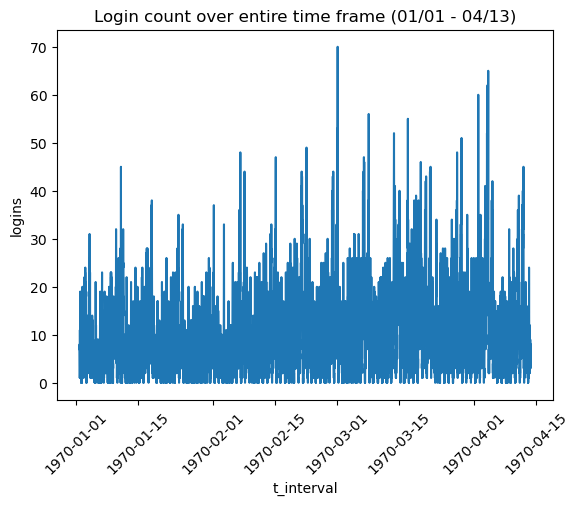

In [12]:
# Time Series Analysis on all the data
ax = sns.lineplot(data=df_count, x='t_interval', y='logins')
ax.tick_params(axis='x', rotation=45)
plt.title("Login count over entire time frame (01/01 - 04/13)")
plt.show()

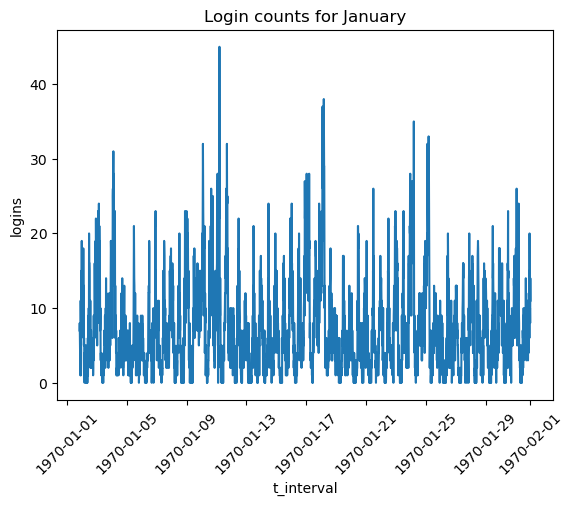

In [13]:
# Time Series analysis of just January
df_count_jan = df_count[df_count['login_M']==1]
df_count_jan

sns.lineplot(data=df_count_jan, x='t_interval', y='logins')
plt.xticks(rotation=45)
plt.title("Login counts for January")
plt.show()

In [14]:
# Convert login_day to the name of the weekday
day_dict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Example:
day = 5
day_dict[day]

'Sat'

In [15]:
t_6am = pd.Timestamp('2023-10-27 06:00:00').time()
t_6pm = pd.Timestamp('2023-10-27 18:00:00').time()

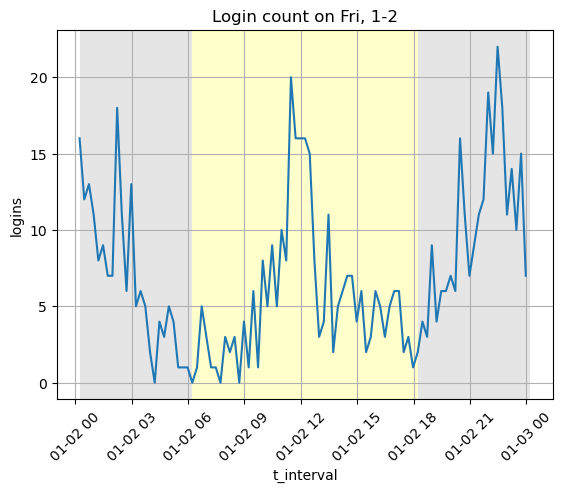

In [16]:
# Make a lineplot for any single day
m, d = 1, 2
df_temp = df_count[(df_count['login_M']==m) & (df_count['login_D']==d)]
time1 = df_temp.iloc[0, 0]
time2 = df_temp.iloc[-1, 0]
login_day = day_dict[df_temp.iloc[0, -2]] # Get the day of the week

ax = sns.lineplot(data=df_temp, x='t_interval', y='logins')
for time in df_temp.t_interval:
    if time.time() < t_6am or time.time() >= t_6pm: # Less than a certain time
        ax.axvspan(time, time + pd.Timedelta(minutes=15), color='grey', alpha=0.2, lw=0)
    else:
        ax.axvspan(time, time + pd.Timedelta(minutes=15), color='yellow', alpha=0.2, lw=0)
plt.title("Login count on " + login_day + ", " + str(m) + "-" + str(d))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



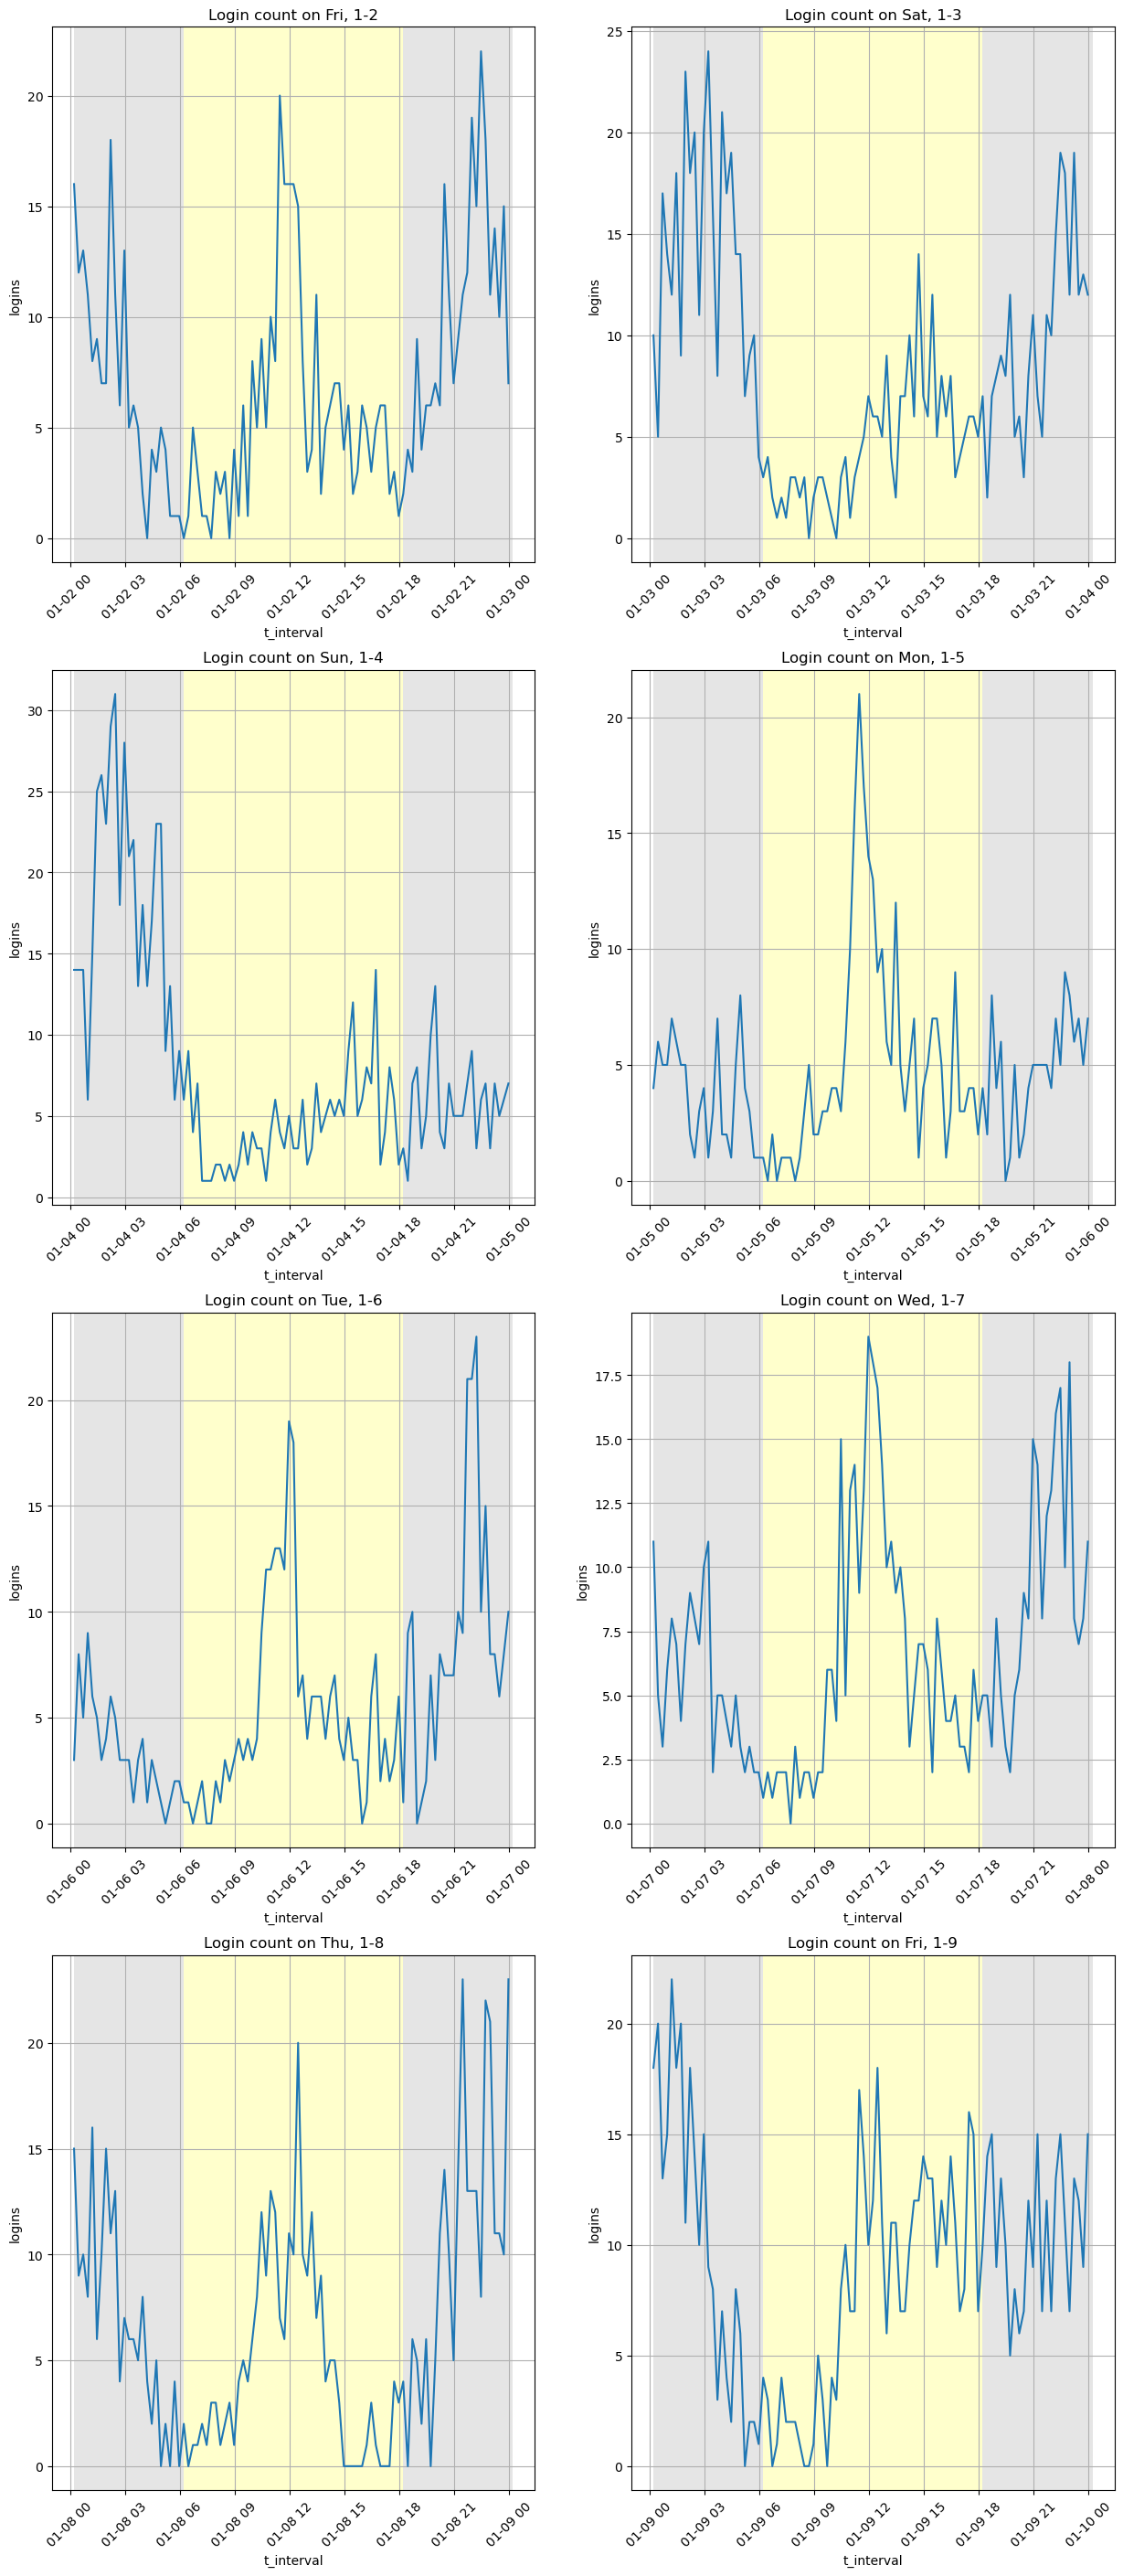

In [17]:
# Daily breakdown of January Week 1
fig, axes = plt.subplots(4, 2, figsize=(15, 35))
m, d = 1, 2
for i in range(4):
    for j in range(2):
        df_temp = df_count[(df_count['login_M']==m) & (df_count['login_D']==d)]
        time1 = df_temp.iloc[0, 0]
        time2 = df_temp.iloc[-1, 0]
        login_day = day_dict[df_temp.iloc[0, -2]] # Get the day of the week
        
        sns.lineplot(data=df_temp, x='t_interval', y='logins', ax=axes[i, j])
        for time in df_temp.t_interval:
            if time.time() < t_6am or time.time() >= t_6pm: # Less than a certain time
                axes[i, j].axvspan(time, time + pd.Timedelta(minutes=15), color='grey', alpha=0.2, lw=0)
            else:
                axes[i, j].axvspan(time, time + pd.Timedelta(minutes=15), color='yellow', alpha=0.2, lw=0)
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].title.set_text("Login count on " + login_day + ", " + str(m) + "-" + str(d))
        axes[i, j].grid(True)
        d += 1
plt.show()

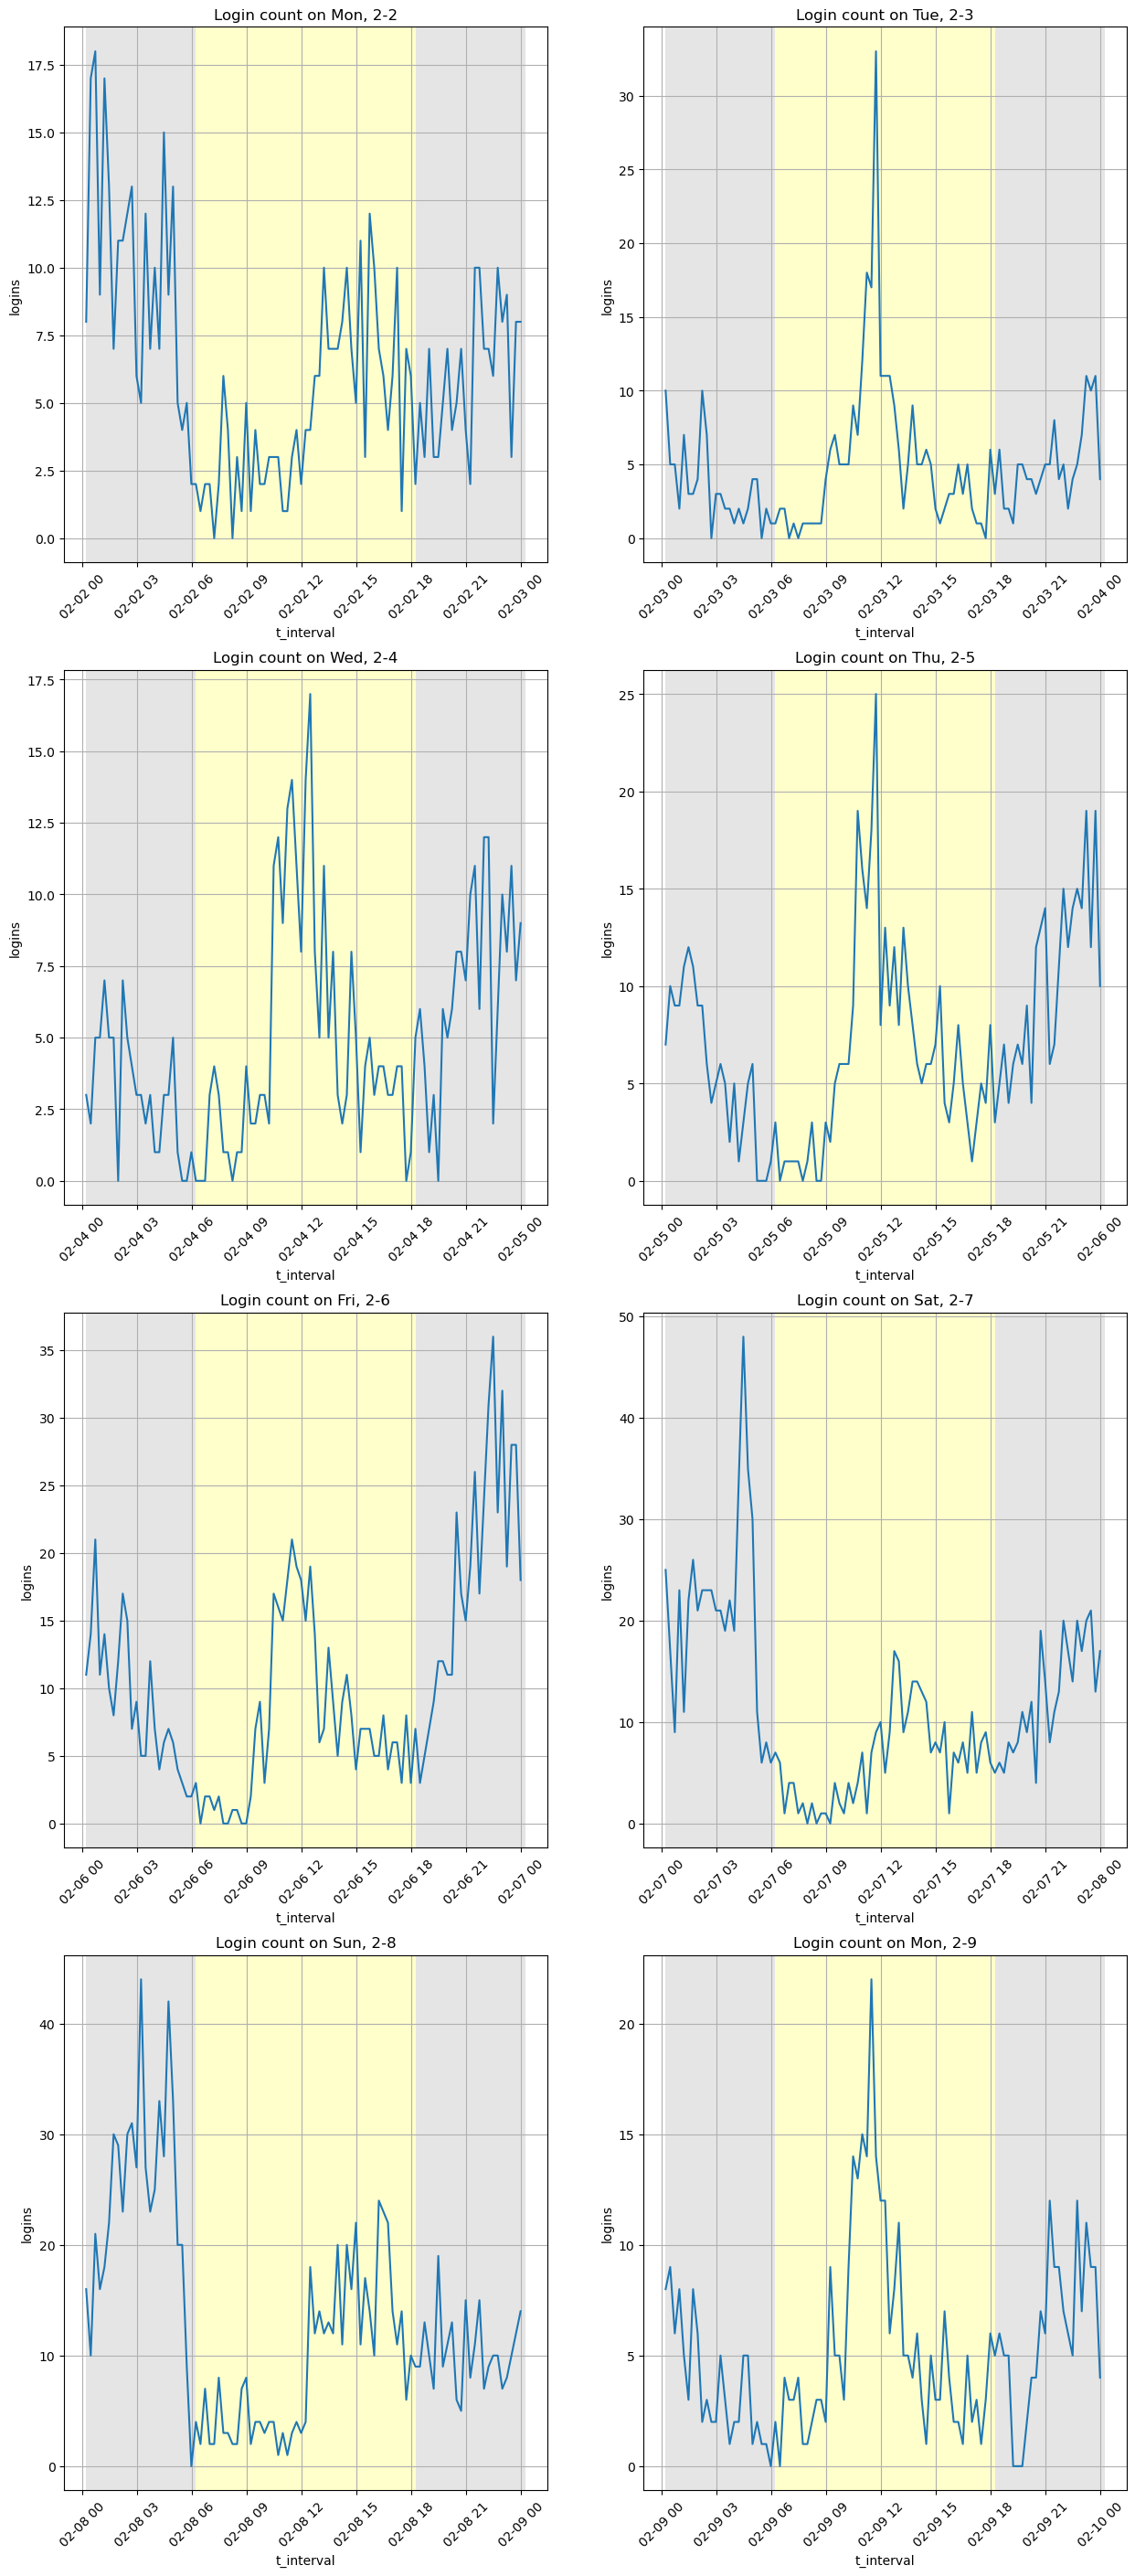

In [18]:
# Daily breakdown of February Week 1
fig, axes = plt.subplots(4, 2, figsize=(15, 35))
m, d = 2, 2
for i in range(4):
    for j in range(2):
        df_temp = df_count[(df_count['login_M']==m) & (df_count['login_D']==d)]
        time1 = df_temp.iloc[0, 0]
        time2 = df_temp.iloc[-1, 0]
        login_day = day_dict[df_temp.iloc[0, -2]] # Get the day of the week
        
        sns.lineplot(data=df_temp, x='t_interval', y='logins', ax=axes[i, j])
        for time in df_temp.t_interval:
            if time.time() < t_6am or time.time() >= t_6pm: # Less than a certain time
                axes[i, j].axvspan(time, time + pd.Timedelta(minutes=15), color='grey', alpha=0.2, lw=0)
            else:
                axes[i, j].axvspan(time, time + pd.Timedelta(minutes=15), color='yellow', alpha=0.2, lw=0)
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].title.set_text("Login count on " + login_day + ", " + str(m) + "-" + str(d))
        axes[i, j].grid(True)
        d += 1
plt.show()

### Daily interval counts

In [20]:
# Aggregate these login counts based on 1 day time intervals
# Initialize empty list to store data, and first and last time stamps
data = []
t1 = pd.to_datetime('1970-01-01 00:00:00')
t_last = df1['login_time'][len(df1)-1]
t2 = t1 + timedelta(days=1)

# While t1 is before the last time stamp...
while t1 < t_last:
    # Set t2 to be t1+15 minutes
    t2 = t1 + timedelta(days=1)
    # count the number of rows between t1 and t2
    count = len(df1[(df1['login_time']>=t1) & (df1['login_time']<t2)])
    # Store t1 and the count into the list
    data.append([t1, count])
    # Set the new t1 to be the old t2
    t1 = t2
    
daily_count = pd.DataFrame(data, columns=['t_interval', 'logins'])

# Extract more data to daily_count
daily_count['login_M'] = daily_count['t_interval'].dt.month
daily_count['login_D'] = daily_count['t_interval'].dt.day
daily_count['login_day'] = daily_count['t_interval'].dt.dayofweek

daily_count.head(5)

t_interval  logins  login_M  login_D  login_day
0 1970-01-01     112        1        1          3
1 1970-01-02     681        1        2          4
2 1970-01-03     793        1        3          5
3 1970-01-04     788        1        4          6
4 1970-01-05     459        1        5          0

In [21]:
# Convert month to the name of the month
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr'}

# Example:
month = 2
month_dict[month]

'Feb'

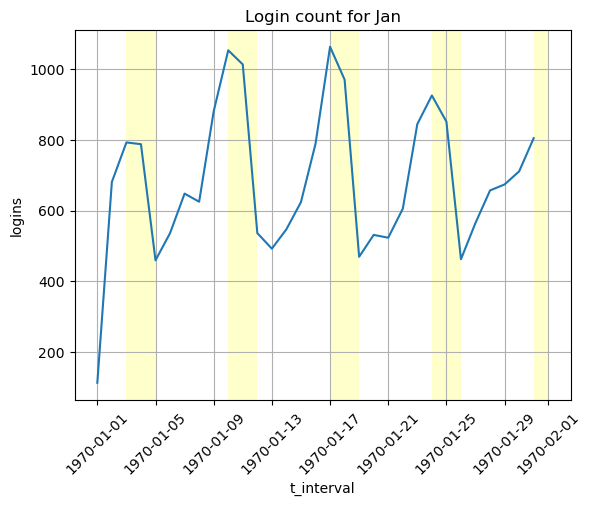

In [22]:
# Make a lineplot for any single month + weekend highlight
m = 1
df_temp = daily_count[daily_count['login_M']==m]
month = month_dict[df_temp.iloc[0, 2]] # Get the month

ax = sns.lineplot(data=df_temp, x='t_interval', y='logins')
plt.title("Login count for " + month)
plt.xticks(rotation=45)
for date in df_temp.t_interval:
    if date.dayofweek >= 5:  # Saturday (5) or Sunday (6)
        ax.axvspan(date, date + pd.Timedelta(days=1), color='yellow', alpha=0.2, lw=0)
plt.grid(True)
plt.show()

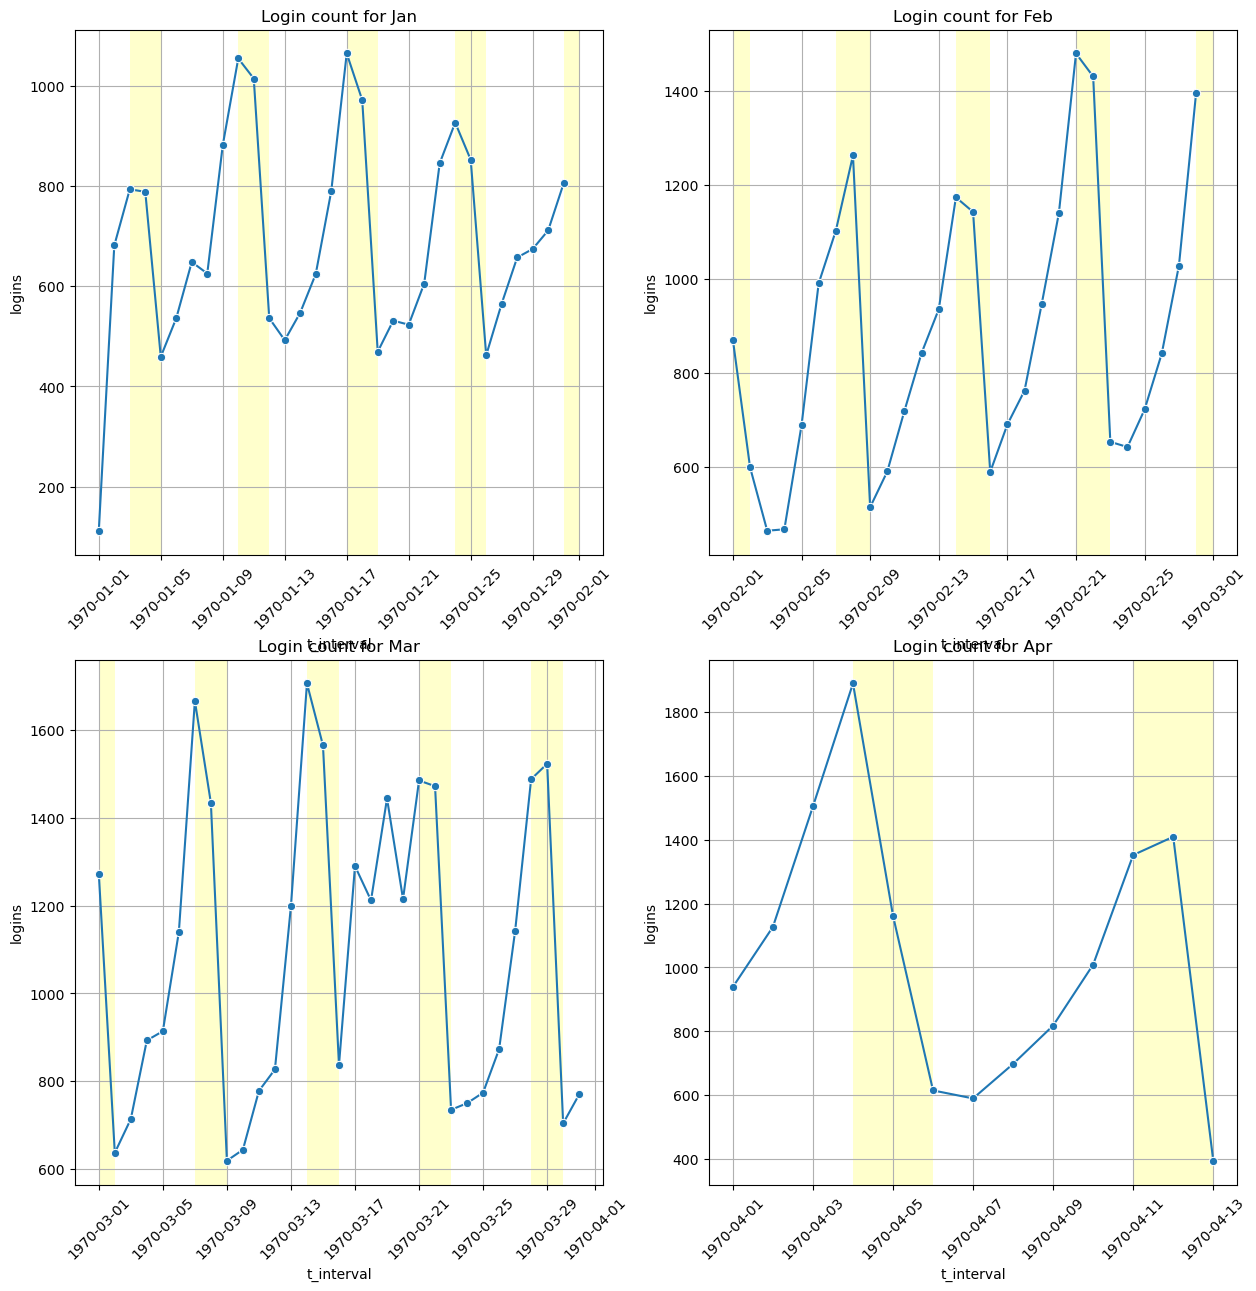

In [23]:
# Monthly snapshot for each month
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
m = 1
for i in range(2):
    for j in range(2):
        df_temp = daily_count[daily_count['login_M']==m]
        month = month_dict[df_temp.iloc[0, 2]] # Get the month
        
        sns.lineplot(data=df_temp, x='t_interval', y='logins', marker='o', ax=axes[i, j])
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].title.set_text("Login count for " + month)
        for date in df_temp.t_interval:
            if date.dayofweek >= 5:  # Saturday (5) or Sunday (6)
                axes[i, j].axvspan(date, date + pd.Timedelta(days=1), color='yellow', alpha=0.2, lw=0)
        axes[i, j].grid(True)
        m += 1
plt.show()

### Weekly analysis

In [25]:
# Aggregate these login counts based on 1 hour time intervals
# Initialize empty list to store data, and first and last time stamps
data = []
t1 = pd.to_datetime('1970-01-01 20:00:00')
t_last = df1['login_time'][len(df1)-1]

# While t1 is before the last time stamp...
while t1 < t_last:
    # Set t2 to be t1+15 minutes
    t2 = t1 + timedelta(minutes=60)
    # count the number of rows between t1 and t2
    count = len(df1[(df1['login_time']>=t1) & (df1['login_time']<t2)])
    # Store t1 and the count into the list
    data.append([t1, count])
    # Set the new t1 to be the old t2
    t1 = t2
    
hourly_count = pd.DataFrame(data, columns=['t_interval', 'logins'])


# Extract more data to df_count
hourly_count['login_M'] = hourly_count['t_interval'].dt.month
hourly_count['login_D'] = hourly_count['t_interval'].dt.day
hourly_count['login_hr'] = hourly_count['t_interval'].dt.hour
hourly_count['login_day'] = hourly_count['t_interval'].dt.dayofweek
hourly_count['time'] = hourly_count['t_interval'].dt.time
hourly_count

t_interval  logins  login_M  login_D  login_hr  login_day  \
0    1970-01-01 20:00:00      24        1        1        20          3   
1    1970-01-01 21:00:00       9        1        1        21          3   
2    1970-01-01 22:00:00      21        1        1        22          3   
3    1970-01-01 23:00:00      58        1        1        23          3   
4    1970-01-02 00:00:00      53        1        2         0          4   
...                  ...     ...      ...      ...       ...        ...   
2442 1970-04-13 14:00:00      32        4       13        14          0   
2443 1970-04-13 15:00:00      19        4       13        15          0   
2444 1970-04-13 16:00:00      22        4       13        16          0   
2445 1970-04-13 17:00:00      22        4       13        17          0   
2446 1970-04-13 18:00:00      20        4       13        18          0   

          time  
0     20:00:00  
1     21:00:00  
2     22:00:00  
3     23:00:00  
4     00:00:00  
...        ...  
2442  14:00:00  
2443  15:00:00  
2444  16:00:00  
2445  17:00:00  
2446  18:00:00  

[2447 rows x 7 columns]

In [26]:
# Focus on Week 1
t1 = pd.to_datetime('1970-01-05 00:00:00') # Start with the first Monday (01-05)
t2 = t1 + timedelta(days=7)

df_week1 = hourly_count[(hourly_count['t_interval']>=t1) & (hourly_count['t_interval']<t2)]
df_week1

t_interval  logins  login_M  login_D  login_hr  login_day  \
76  1970-01-05 00:00:00      22        1        5         0          0   
77  1970-01-05 01:00:00      24        1        5         1          0   
78  1970-01-05 02:00:00      11        1        5         2          0   
79  1970-01-05 03:00:00      14        1        5         3          0   
80  1970-01-05 04:00:00      12        1        5         4          0   
..                  ...     ...      ...      ...       ...        ...   
239 1970-01-11 19:00:00      19        1       11        19          6   
240 1970-01-11 20:00:00      26        1       11        20          6   
241 1970-01-11 21:00:00      22        1       11        21          6   
242 1970-01-11 22:00:00      20        1       11        22          6   
243 1970-01-11 23:00:00      21        1       11        23          6   

         time  
76   00:00:00  
77   01:00:00  
78   02:00:00  
79   03:00:00  
80   04:00:00  
..        ...  
239  19:00:00  
240  20:00:00  
241  21:00:00  
242  22:00:00  
243  23:00:00  

[168 rows x 7 columns]

In [27]:
print(type(t_6am))
print(t_6am)

<class 'datetime.time'>
06:00:00


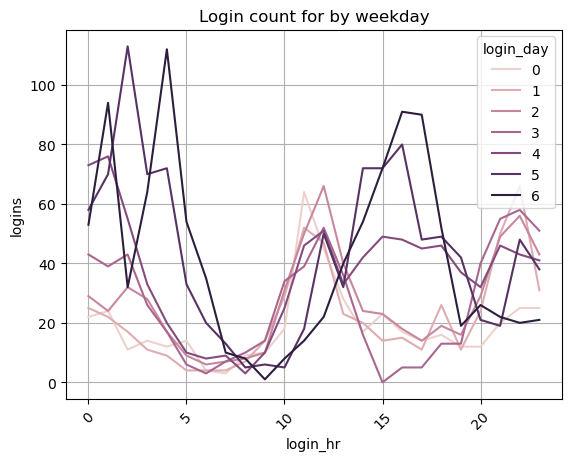

In [28]:
# Make a lineplot for the first full week
# m = 1
# df_temp = daily_count[daily_count['login_M']==m]
# month = month_dict[df_temp.iloc[0, 2]] # Get the month

ax = sns.lineplot(data=df_week1, x="login_hr", y='logins', hue='login_day')
plt.title("Login count for by weekday")
plt.xticks(rotation=45)
# for time in df_week1.t_interval:
#     if time.time() < t_6am:
#         ax.axvspan(time, time+1, color='grey', alpha=0.2, lw=0)
    # if time.time() < t_6am or time.time() >= t_6pm: # Less than a certain time
        # ax.axvspan(time, time + pd.Timedelta(minutes=60), color='grey', alpha=0.2, lw=0)
    # else:
    #     ax.axvspan(time, time + pd.Timedelta(minutes=60), color='yellow', alpha=0.2, lw=0)
plt.grid(True)
plt.show()

### Comparing each day of the week across the weeks

C:\Users\yenmi\AppData\Local\Temp\ipykernel_14344\111345703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')


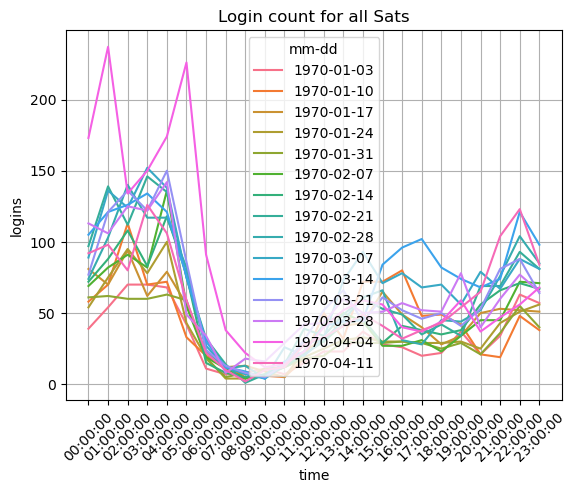

In [30]:
# Method 4: Make a new column that only combines month and date
d = 5
df_day = hourly_count[hourly_count['login_day']==d]
df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')
login_day = day_dict[df_day.iloc[0, -3]]
# df_day.head(10)

ax = sns.lineplot(data=df_day, x=df_day['time'].astype(str), y='logins', hue='mm-dd')
plt.title("Login count for all " + login_day + "s")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\yenmi\AppData\Local\Temp\ipykernel_14344\57708861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')
C:\Users\yenmi\AppData\Local\Temp\ipykernel_14344\57708861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')
C:\Users\yenmi\AppData\Local\Temp\ipykernel_14344\57708861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

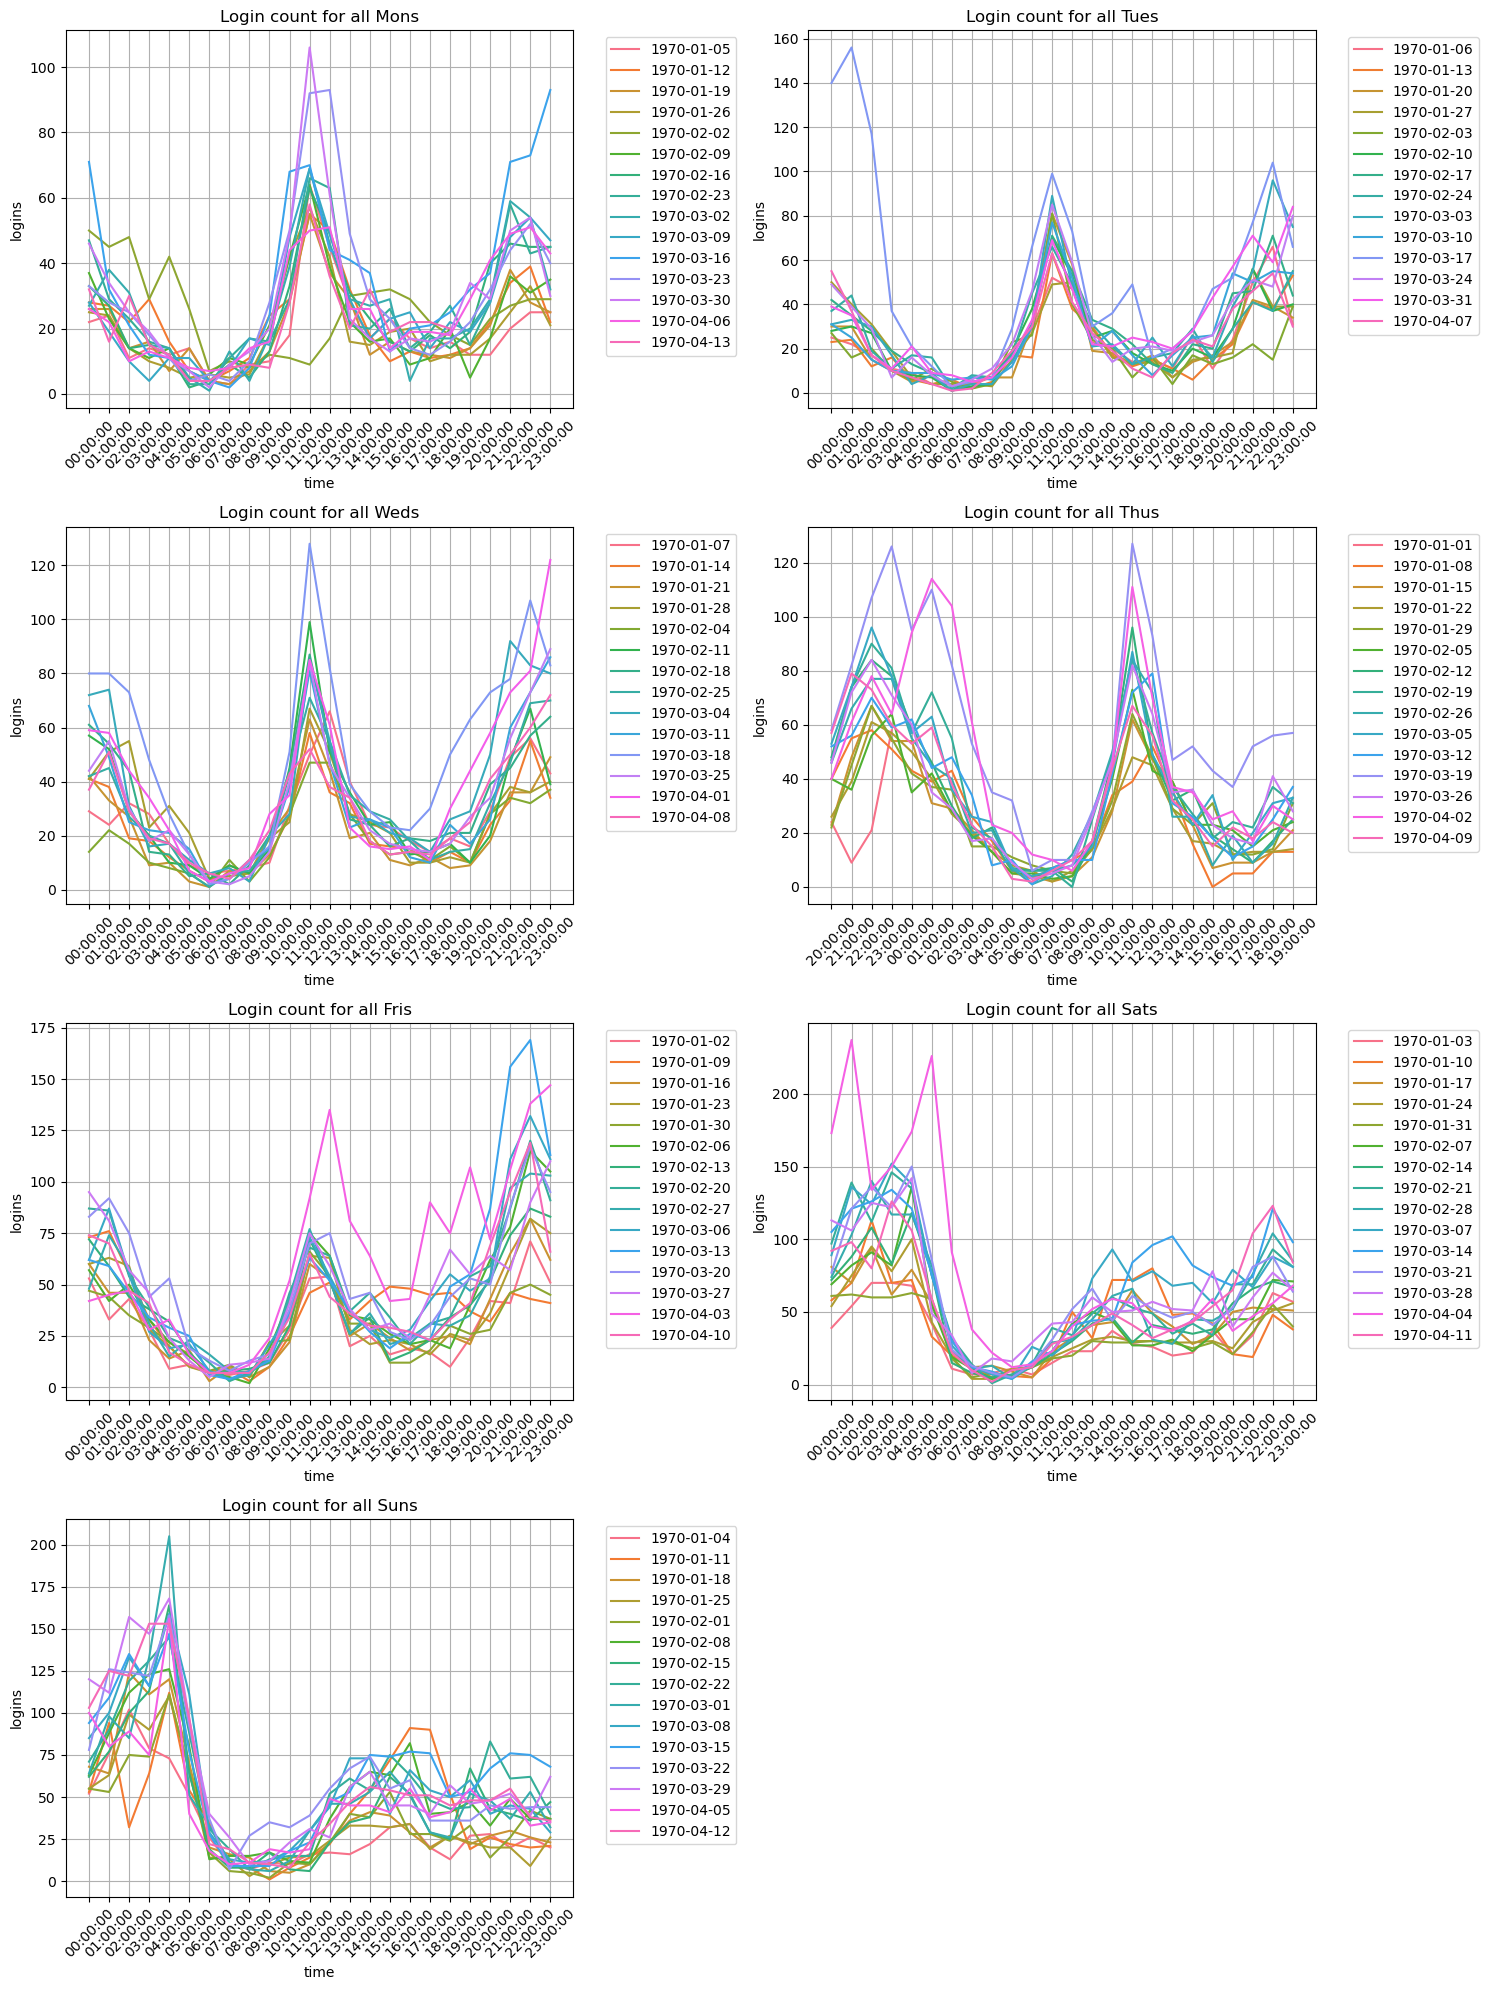

In [31]:
# Method 4: Make a new column that only combines month and date
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
d = 0

for i in range(4):
    for j in range(2):
        if d != 7:
            df_day = hourly_count[hourly_count['login_day']==d]
            df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')
            login_day = day_dict[df_day.iloc[0, -3]]
    
            sns.lineplot(data=df_day, x=df_day['time'].astype(str), y='logins', hue='mm-dd', ax=axes[i, j])
            axes[i, j].title.set_text("Login count for all " + login_day + "s")
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            axes[i, j].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            d += 1
        
fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()

C:\Users\yenmi\AppData\Local\Temp\ipykernel_14344\1814516659.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')
C:\Users\yenmi\AppData\Local\Temp\ipykernel_14344\1814516659.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')
C:\Users\yenmi\AppData\Local\Temp\ipykernel_14344\1814516659.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

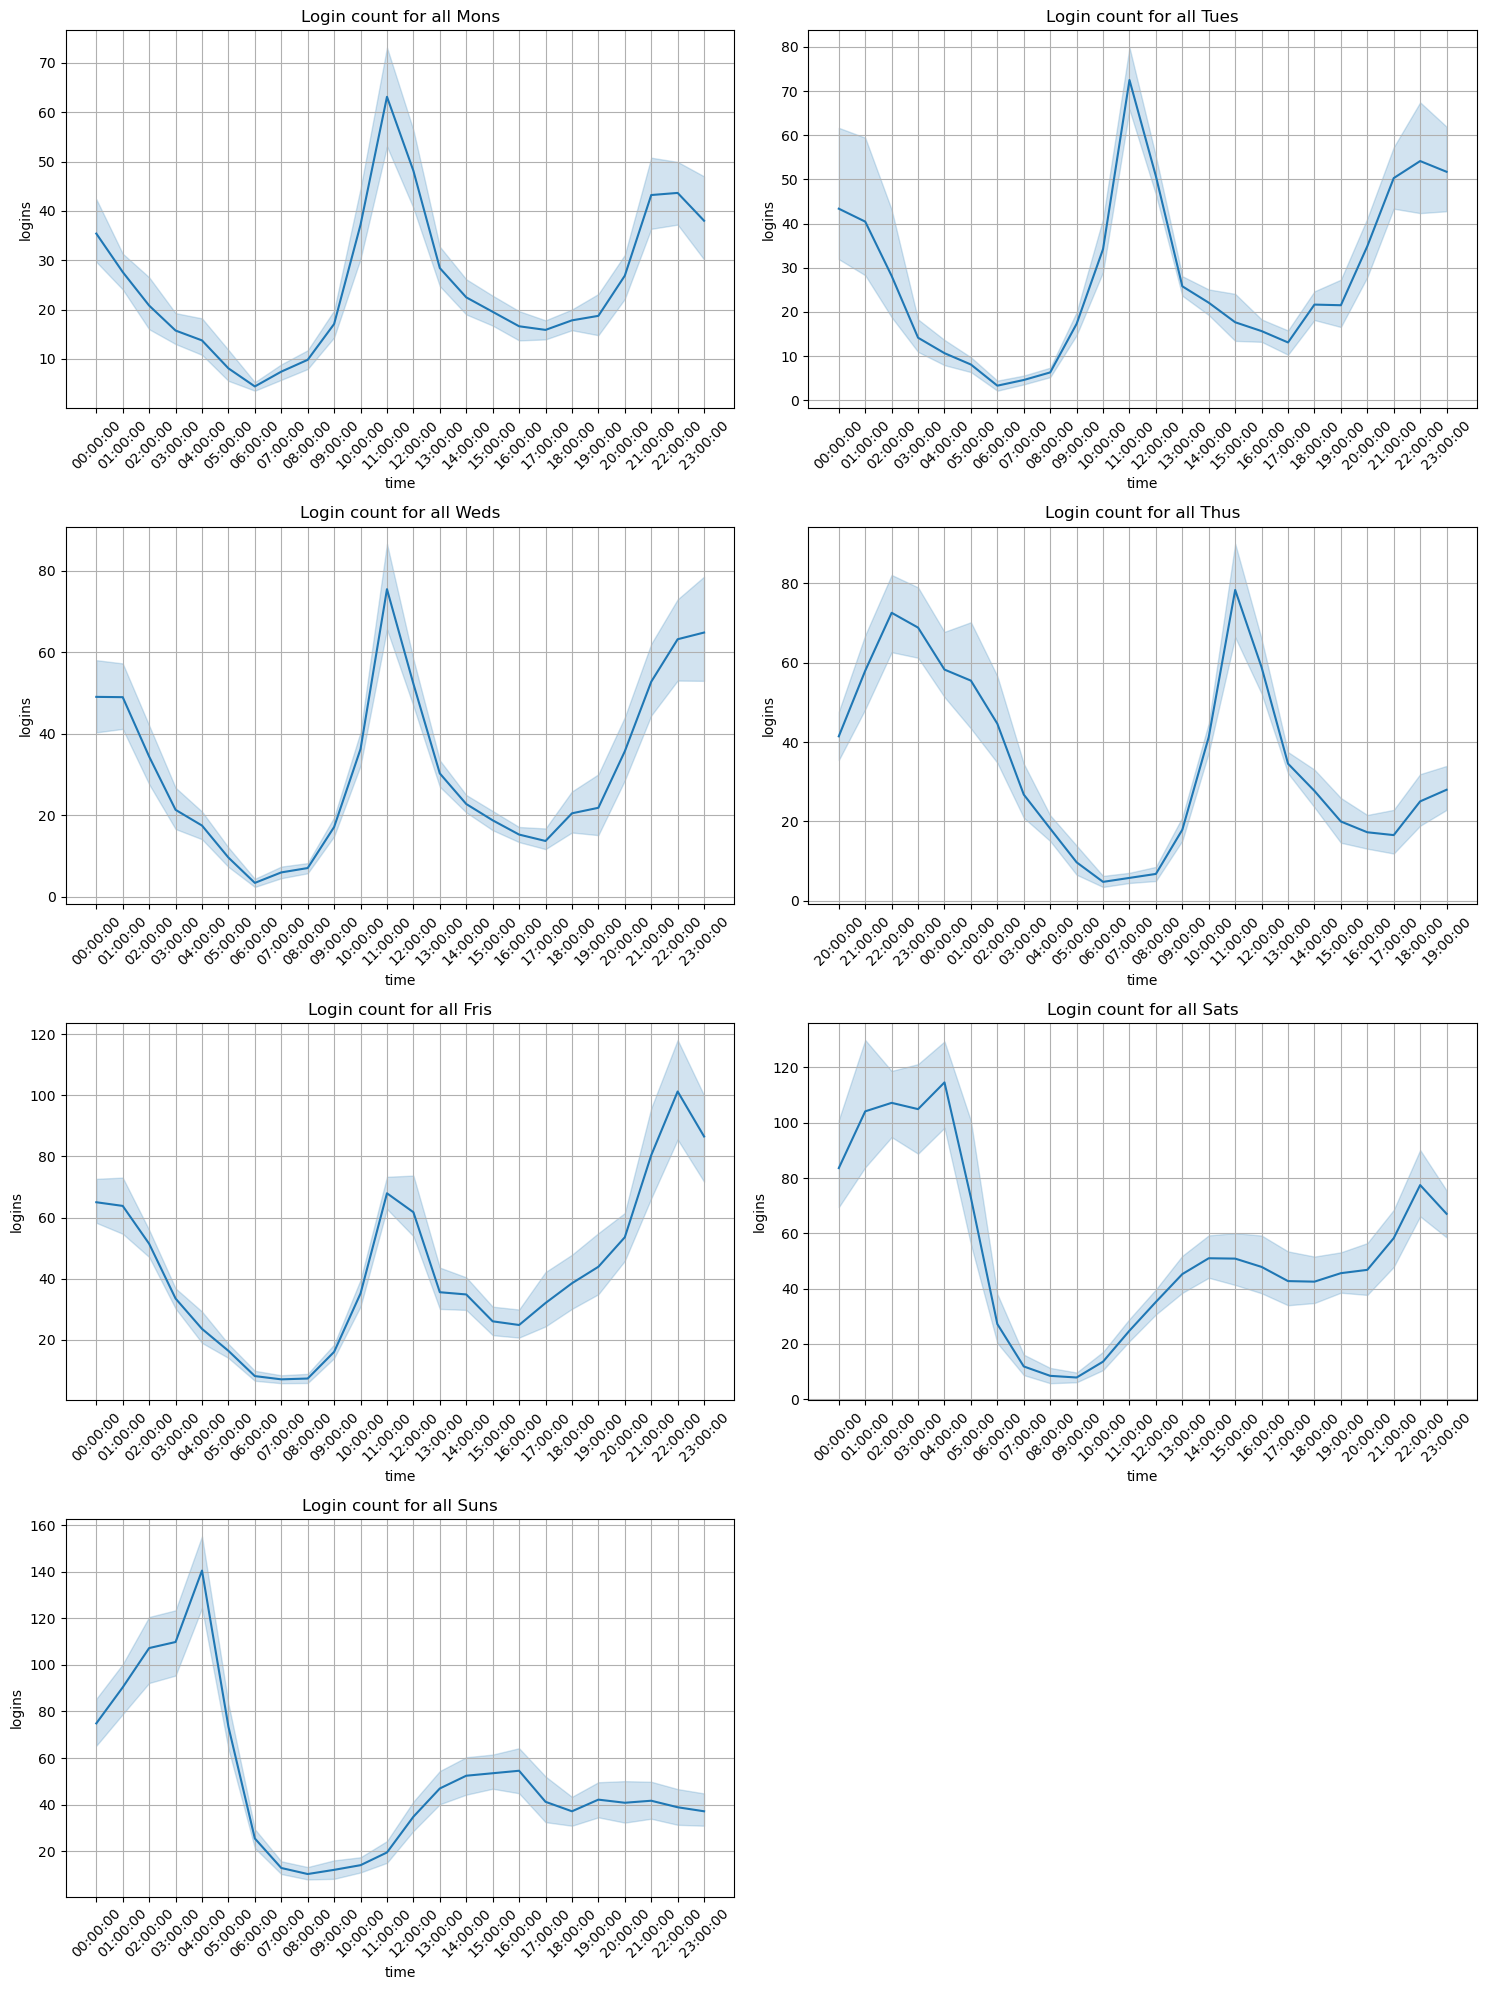

In [32]:
# Method 4: Make a new column that only combines month and date
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
d = 0

for i in range(4):
    for j in range(2):
        if d != 7:
            df_day = hourly_count[hourly_count['login_day']==d]
            df_day['mm-dd'] = df_day['t_interval'].dt.to_period('D')
            login_day = day_dict[df_day.iloc[0, -3]]
    
            sns.lineplot(data=df_day, x=df_day['time'].astype(str), y='logins', ax=axes[i, j])
            axes[i, j].title.set_text("Login count for all " + login_day + "s")
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            # axes[i, j].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            d += 1
        
fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()

## Part 1 Observations:
* Highest use days are Sat and Sun
* The biggest peak of all tends to be Sunday 3am (130-150 logins)
* Big peaks around Fri 9pm - Sat 3am and Sat 9pm - Sun 3am (80-130 logins)
* Mon-Fri, peaks around noon (50-80 logins) and smaller peaks around 9pm - midnight (around 40-70 logins)
* Monday is the lowest login day 

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any cave
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.ats.

1. KEY MEASURES OF SUCCESS:
* % change in counts for each hour/day, especially for peak time intervals

* If successful, you'll see an increase of more people going between Metropolis and Gotham. More people will enter Gotham early evening and return late evening/early hours of the morning.

2. PROPOSED EXPERIMENT:
* 4 months with tolls reimbursed (maybe next 4 months? Or Jan to April of next year?) Compare the data between before and after of the counts of the hourly logins.

* ADD: T-TEST, NULL HYPOTHESIS, CORRELATION VALUE, P-VALUE

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the 
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).challenge

### Part A: Initial overview, making new columns, looking at distribution of data, imputing missing data

In [38]:
df2.sample(5)

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
19920  Winterfell                       7  2014-01-18                   4.7   
2909   Winterfell                       0  2014-01-29                   5.0   
1203   Winterfell                       1  2014-01-24                   5.0   
30945  Winterfell                       0  2014-01-13                   4.0   
4173      Astapor                       0  2014-01-06                   4.0   

       avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
19920       1.02     2014-06-28  Android        4.3                False   
2909        1.00     2014-03-18   iPhone        0.0                 True   
1203        1.00     2014-01-24   iPhone        0.0                False   
30945       1.00     2014-04-18  Android        0.0                False   
4173        1.25     2014-03-30   iPhone       33.3                 True   

       weekday_pct  avg_dist  avg_rating_by_driver  
19920         47.8      7.06                   4.6  
2909         100.0      1.83                   5.0  
1203         100.0      0.01                   5.0  
30945        100.0      6.75                   5.0  
4173          33.3      7.98                   5.0

In [39]:
df2.shape

(50000, 12)

In [40]:
# Make new column for if the trips_in_first_30_days is not 0 ('retained?')
df2['retained'] = False
df2['retained'] = df2['retained'].where(df2['trips_in_first_30_days']==0, True)
df2.sample(5)

city  trips_in_first_30_days signup_date  \
35430  King's Landing                       1  2014-01-18   
42064      Winterfell                       1  2014-01-31   
42990      Winterfell                       7  2014-01-08   
5562   King's Landing                       0  2014-01-28   
44074         Astapor                       0  2014-01-10   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
35430                   4.6       1.01     2014-06-24   iPhone        3.3   
42064                   5.0       1.00     2014-02-02  Android        0.0   
42990                   5.0       1.00     2014-01-11   iPhone        0.0   
5562                    5.0       1.04     2014-07-01   iPhone       14.3   
44074                   5.0       1.00     2014-05-31   iPhone        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
35430                 True         96.7      3.88                   4.9   
42064                False          0.0     28.42                   5.0   
42990                False         85.7      5.89                   4.9   
5562                  True         42.9      2.11                   5.0   
44074                False          0.0      8.74                   5.0   

       retained  
35430      True  
42064      True  
42990      True  
5562      False  
44074     False

In [41]:
# New column for diff between signup_date and last_trip_date
# Convert to datetime. Then subtract and count the number of days
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['days_active'] = (df2['last_trip_date'] - df2['signup_date']).dt.days
df2.sample(5)

city  trips_in_first_30_days signup_date  \
17437         Astapor                       0  2014-01-08   
46303         Astapor                       2  2014-01-19   
29516  King's Landing                       6  2014-01-05   
29029         Astapor                       2  2014-01-24   
28910         Astapor                       1  2014-01-16   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
17437                   5.0       1.00     2014-06-22   iPhone        0.0   
46303                   5.0       1.00     2014-06-29   iPhone        0.0   
29516                   4.4       1.00     2014-02-13  Android        0.0   
29029                   NaN       1.00     2014-02-11   iPhone        0.0   
28910                   4.0       1.33     2014-04-27  Android       66.7   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
17437                False          0.0      2.26                   5.0   
46303                False         50.0      3.35                   4.9   
29516                False         85.7      6.08                   5.0   
29029                False         50.0      1.59                   3.5   
28910                False         33.3      4.60                   4.7   

       retained  days_active  
17437     False          165  
46303      True          161  
29516      True           39  
29029      True           18  
28910      True          101

In [42]:
# New column for day of week of signup_date
df2['signup_dayofweek'] = df2['signup_date'].dt.dayofweek

# 0: Mon, 1: Tue, 2: Wed, 3: Thu, 4: Fri, 5: Sat, 6: Sun

In [43]:
# Count missing values
df2.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
days_active                  0
signup_dayofweek             0
dtype: int64

In [185]:
df2['avg_rating_of_driver'].isna().sum()/50000
# 16% of driver ratings is missing

0.16244

In [201]:
# Create new columns to indicate which ones are missing, in case that's an indicator.
df2['rating_of_driver_missing'] = True
df2['rating_of_driver_missing'] = df2['rating_of_driver_missing'].where(df2['avg_rating_of_driver'].isna(), False)

df2['rating_by_driver_missing'] = True
df2['rating_by_driver_missing'] = df2['rating_by_driver_missing'].where(df2['avg_rating_by_driver'].isna(), False)

# Check to see if it worked
df2[df2['avg_rating_of_driver'].isna()].head()
df2[df2['avg_rating_by_driver'].isna()].head()

In [211]:
# Impute missing values with average
df2.fillna(value={'avg_rating_of_driver': df2['avg_rating_of_driver'].mean(), 'avg_rating_by_driver': df2['avg_rating_by_driver'].mean()}, inplace=True)

In [213]:
df2.isna().sum()

city                          0
trips_in_first_30_days        0
signup_date                   0
avg_rating_of_driver          0
avg_surge                     0
last_trip_date                0
phone                       396
surge_pct                     0
ultimate_black_user           0
weekday_pct                   0
avg_dist                      0
avg_rating_by_driver          0
retained                      0
days_active                   0
signup_dayofweek              0
signup_M                      0
signup_D                      0
signup_weekend                0
last_trip_M                   0
last_trip_D                   0
last_trip_dayofweek           0
last_trip_weekend             0
rating_of_driver_missing      0
rating_by_driver_missing      0
dtype: int64

In [44]:
df2.describe()

trips_in_first_30_days                 signup_date  \
count            50000.000000                       50000   
mean                 2.278200  2014-01-16 13:04:20.352000   
min                  0.000000         2014-01-01 00:00:00   
25%                  0.000000         2014-01-09 00:00:00   
50%                  1.000000         2014-01-17 00:00:00   
75%                  3.000000         2014-01-24 00:00:00   
max                125.000000         2014-01-31 00:00:00   
std                  3.792684                         NaN   

       avg_rating_of_driver     avg_surge                 last_trip_date  \
count          41878.000000  50000.000000                          50000   
mean               4.601559      1.074764  2014-04-19 08:02:04.992000256   
min                1.000000      1.000000            2014-01-01 00:00:00   
25%                4.300000      1.000000            2014-02-14 00:00:00   
50%                4.900000      1.000000            2014-05-08 00:00:00   
75%                5.000000      1.050000            2014-06-18 00:00:00   
max                5.000000      8.000000            2014-07-01 00:00:00   
std                0.617338      0.222336                            NaN   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  \
count  50000.000000  50000.000000  50000.000000          49799.000000   
mean       8.849536     60.926084      5.796827              4.778158   
min        0.000000      0.000000      0.000000              1.000000   
25%        0.000000     33.300000      2.420000              4.700000   
50%        0.000000     66.700000      3.880000              5.000000   
75%        8.600000    100.000000      6.940000              5.000000   
max      100.000000    100.000000    160.960000              5.000000   
std       19.958811     37.081503      5.707357              0.446652   

        days_active  signup_dayofweek  
count  50000.000000      50000.000000  
mean      92.790100          3.309620  
min        0.000000          0.000000  
25%       27.000000          2.000000  
50%      110.000000          4.000000  
75%      150.000000          5.000000  
max      181.000000          6.000000  
std       62.129822          1.880666

In [45]:
columns = df2.columns
for col in columns:
    print("-----------" + col + "-----------")
    print(df2[col].value_counts())
    print("")

-----------city-----------
city
Winterfell        23336
Astapor           16534
King's Landing    10130
Name: count, dtype: int64

-----------trips_in_first_30_days-----------
trips_in_first_30_days
0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
15       155
14       147
17       113
16       108
18        80
19        69
20        51
23        45
21        40
22        34
24        33
27        28
28        21
25        20
26        19
30        15
34        11
29         9
37         9
33         9
32         8
31         6
44         5
40         5
43         4
38         4
39         3
36         3
47         3
42         3
53         2
48         2
49         2
55         2
35         2
54         2
56         2
71         1
73         1
125        1
41         1
50         1
63         1
51         1
58         1
Name: count, dtype: int64

-------

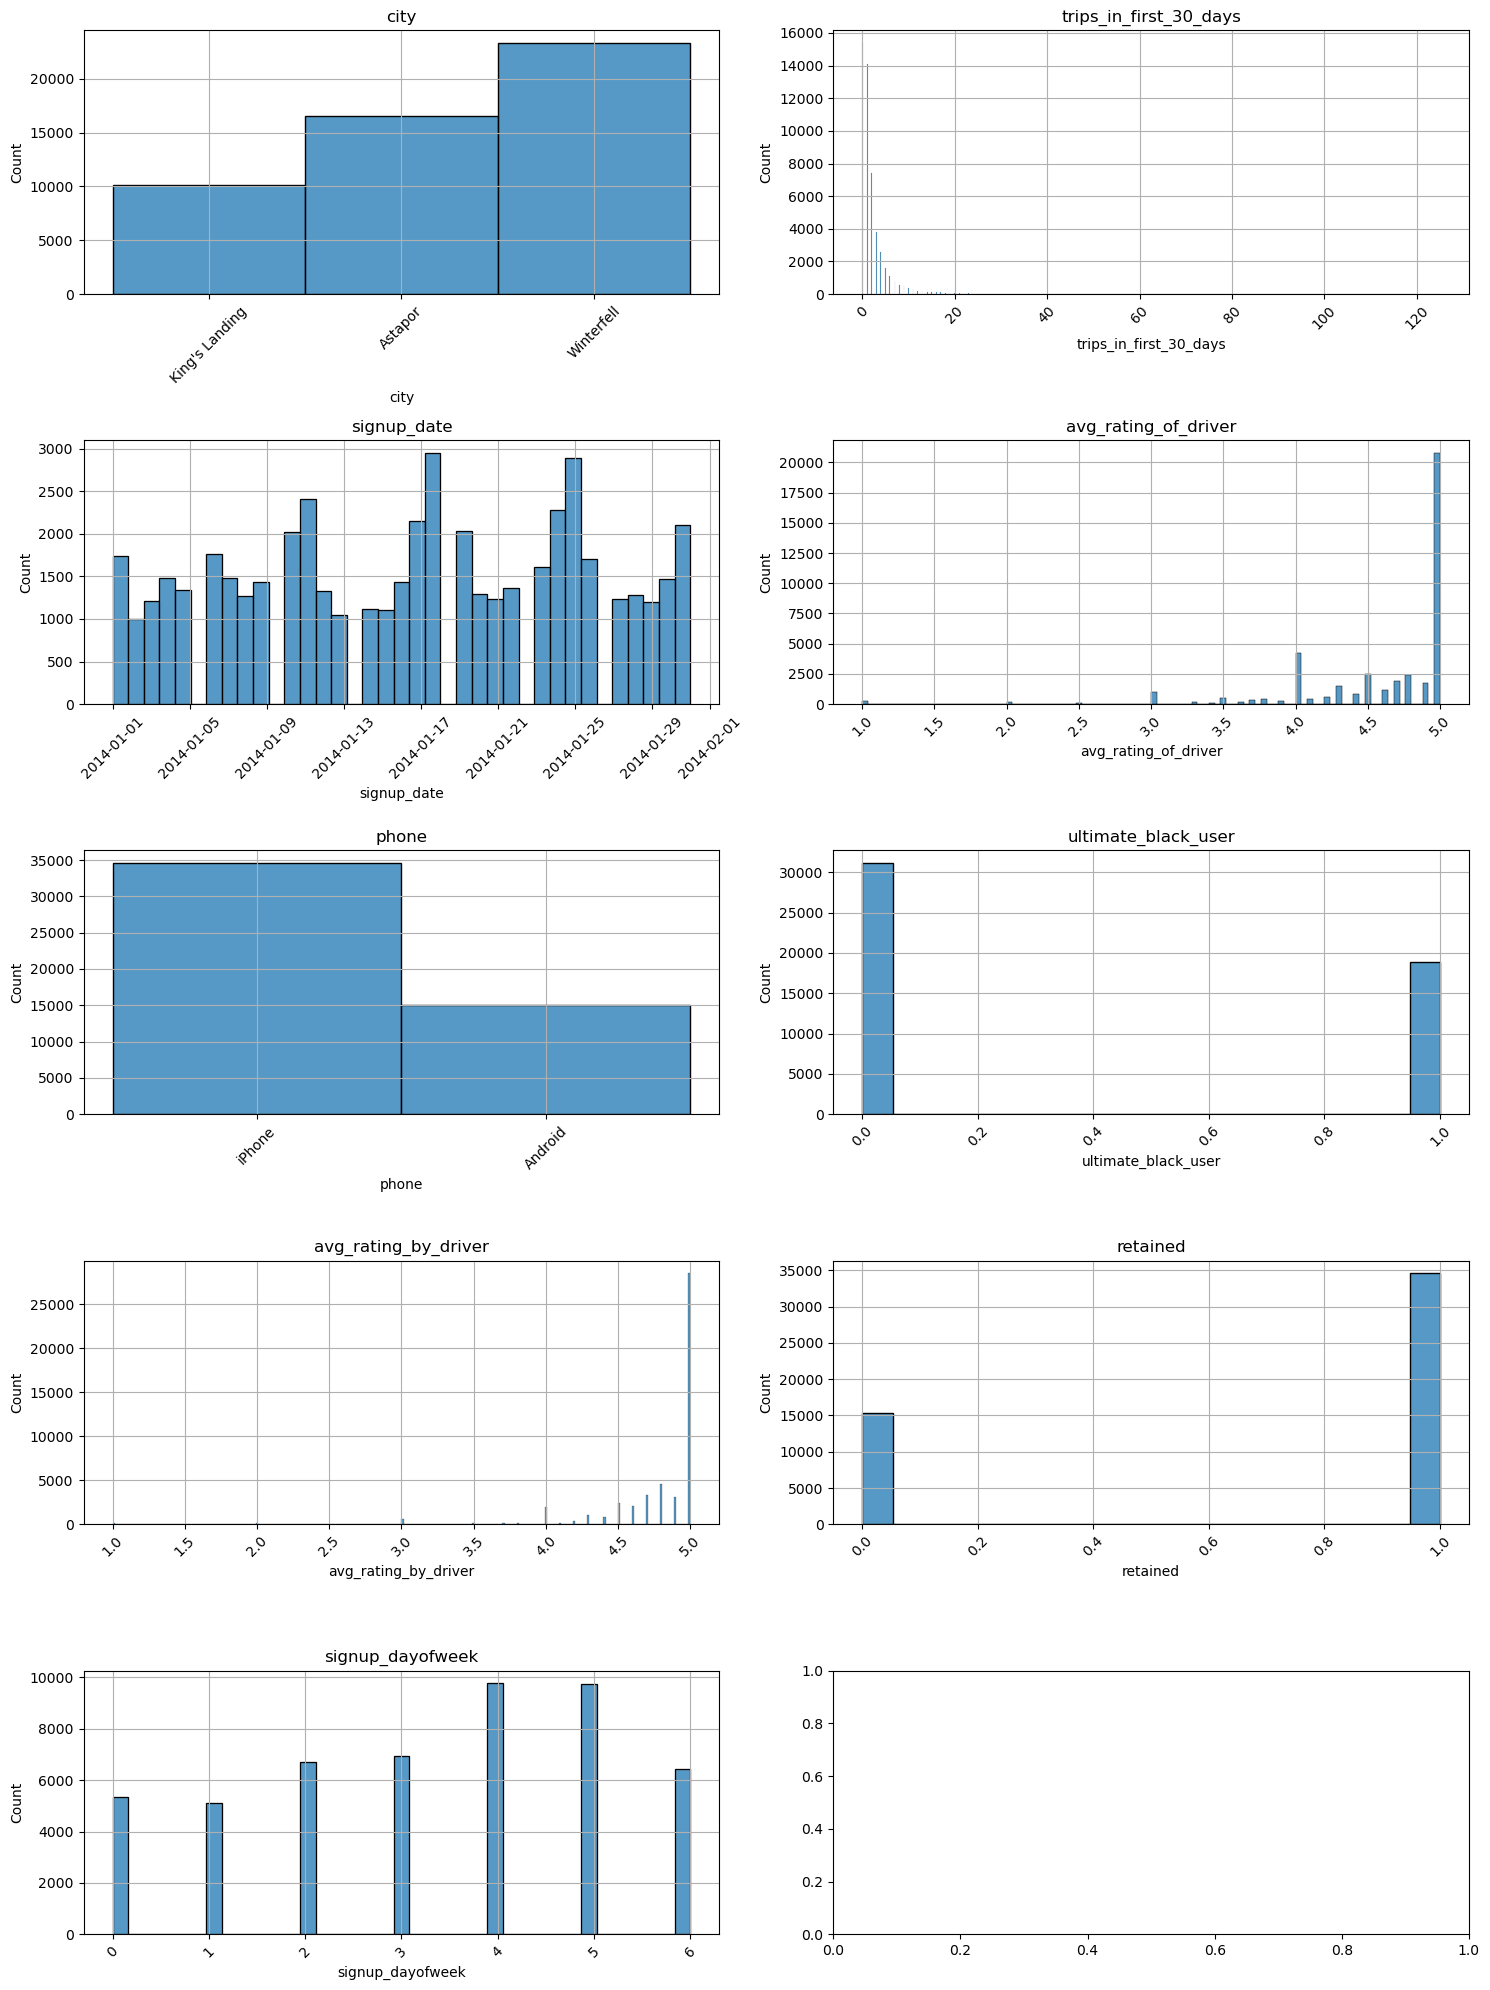

In [46]:
# Histograms of 9 basic features
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

columns = ['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'phone', 'ultimate_black_user', 'avg_rating_by_driver', 'retained', 'signup_dayofweek']

c=0
for i in range(5):
    for j in range(2):
        if c != 9:
            sns.histplot(data=df2, x=columns[c], ax=axes[i, j])
            axes[i, j].title.set_text(columns[c])
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            c += 1

plt.tight_layout()
plt.show()

In [47]:
# Reduce before making histograms
# Just take their top numbers
columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

for c in columns:
    print("------------" + c + "------------")
    print(df2[c].value_counts().head(15))
    print ("")

------------avg_surge------------
avg_surge
1.00    34454
1.25     1100
1.13      956
1.02      809
1.08      798
1.04      774
1.06      770
1.05      704
1.03      619
1.07      616
1.10      508
1.50      505
1.01      484
1.17      473
1.11      446
Name: count, dtype: int64

------------last_trip_date------------
last_trip_date
2014-06-29    2036
2014-06-28    1679
2014-06-30    1408
2014-06-27    1120
2014-06-22    1024
2014-06-21     869
2014-01-19     848
2014-01-26     808
2014-06-26     793
2014-06-14     665
2014-06-15     647
2014-06-20     612
2014-06-25     603
2014-01-25     601
2014-01-12     586
Name: count, dtype: int64

------------surge_pct------------
surge_pct
0.0      34409
100.0     1416
50.0      1367
33.3      1152
25.0       906
20.0       790
16.7       708
14.3       533
12.5       439
11.1       393
10.0       335
9.1        293
8.3        256
7.7        220
22.2       212
Name: count, dtype: int64

------------weekday_pct------------
weekday_pct
100.0    

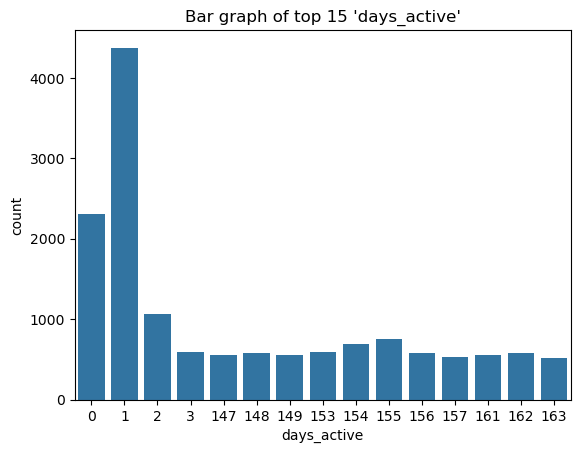

In [48]:
# Create a bar graph by 1) grabbing the top 15 count of a variable, 2) converting value_counts into a dataframe and 3) plotting it on a bar graph
df2_temp = pd.DataFrame(df2['days_active'].value_counts().head(15)).reset_index()

sns.barplot(data=df2_temp, x='days_active', y='count')
plt.title("Bar graph of top 15 'days_active'")
plt.show()

In [49]:
# Create a histogram by 1) grabbing the top 15 count of a variable, 2) grabbing the index, 3) filtering the original df2 with the index, and 4) plotting it on a histogram

# list = df2['days_active'].value_counts().head(15).index
# df2_temp = df2[df2['days_active'].isin(list)]
# df2_temp

# sns.histplot(data=df2_temp, x='days_active')
# plt.title("Histogram of top 15 'days_active'")
# plt.show()

# Note: for these ones, it's better to do a bar graph instead of histogram, since the histogram will clump groupings together.

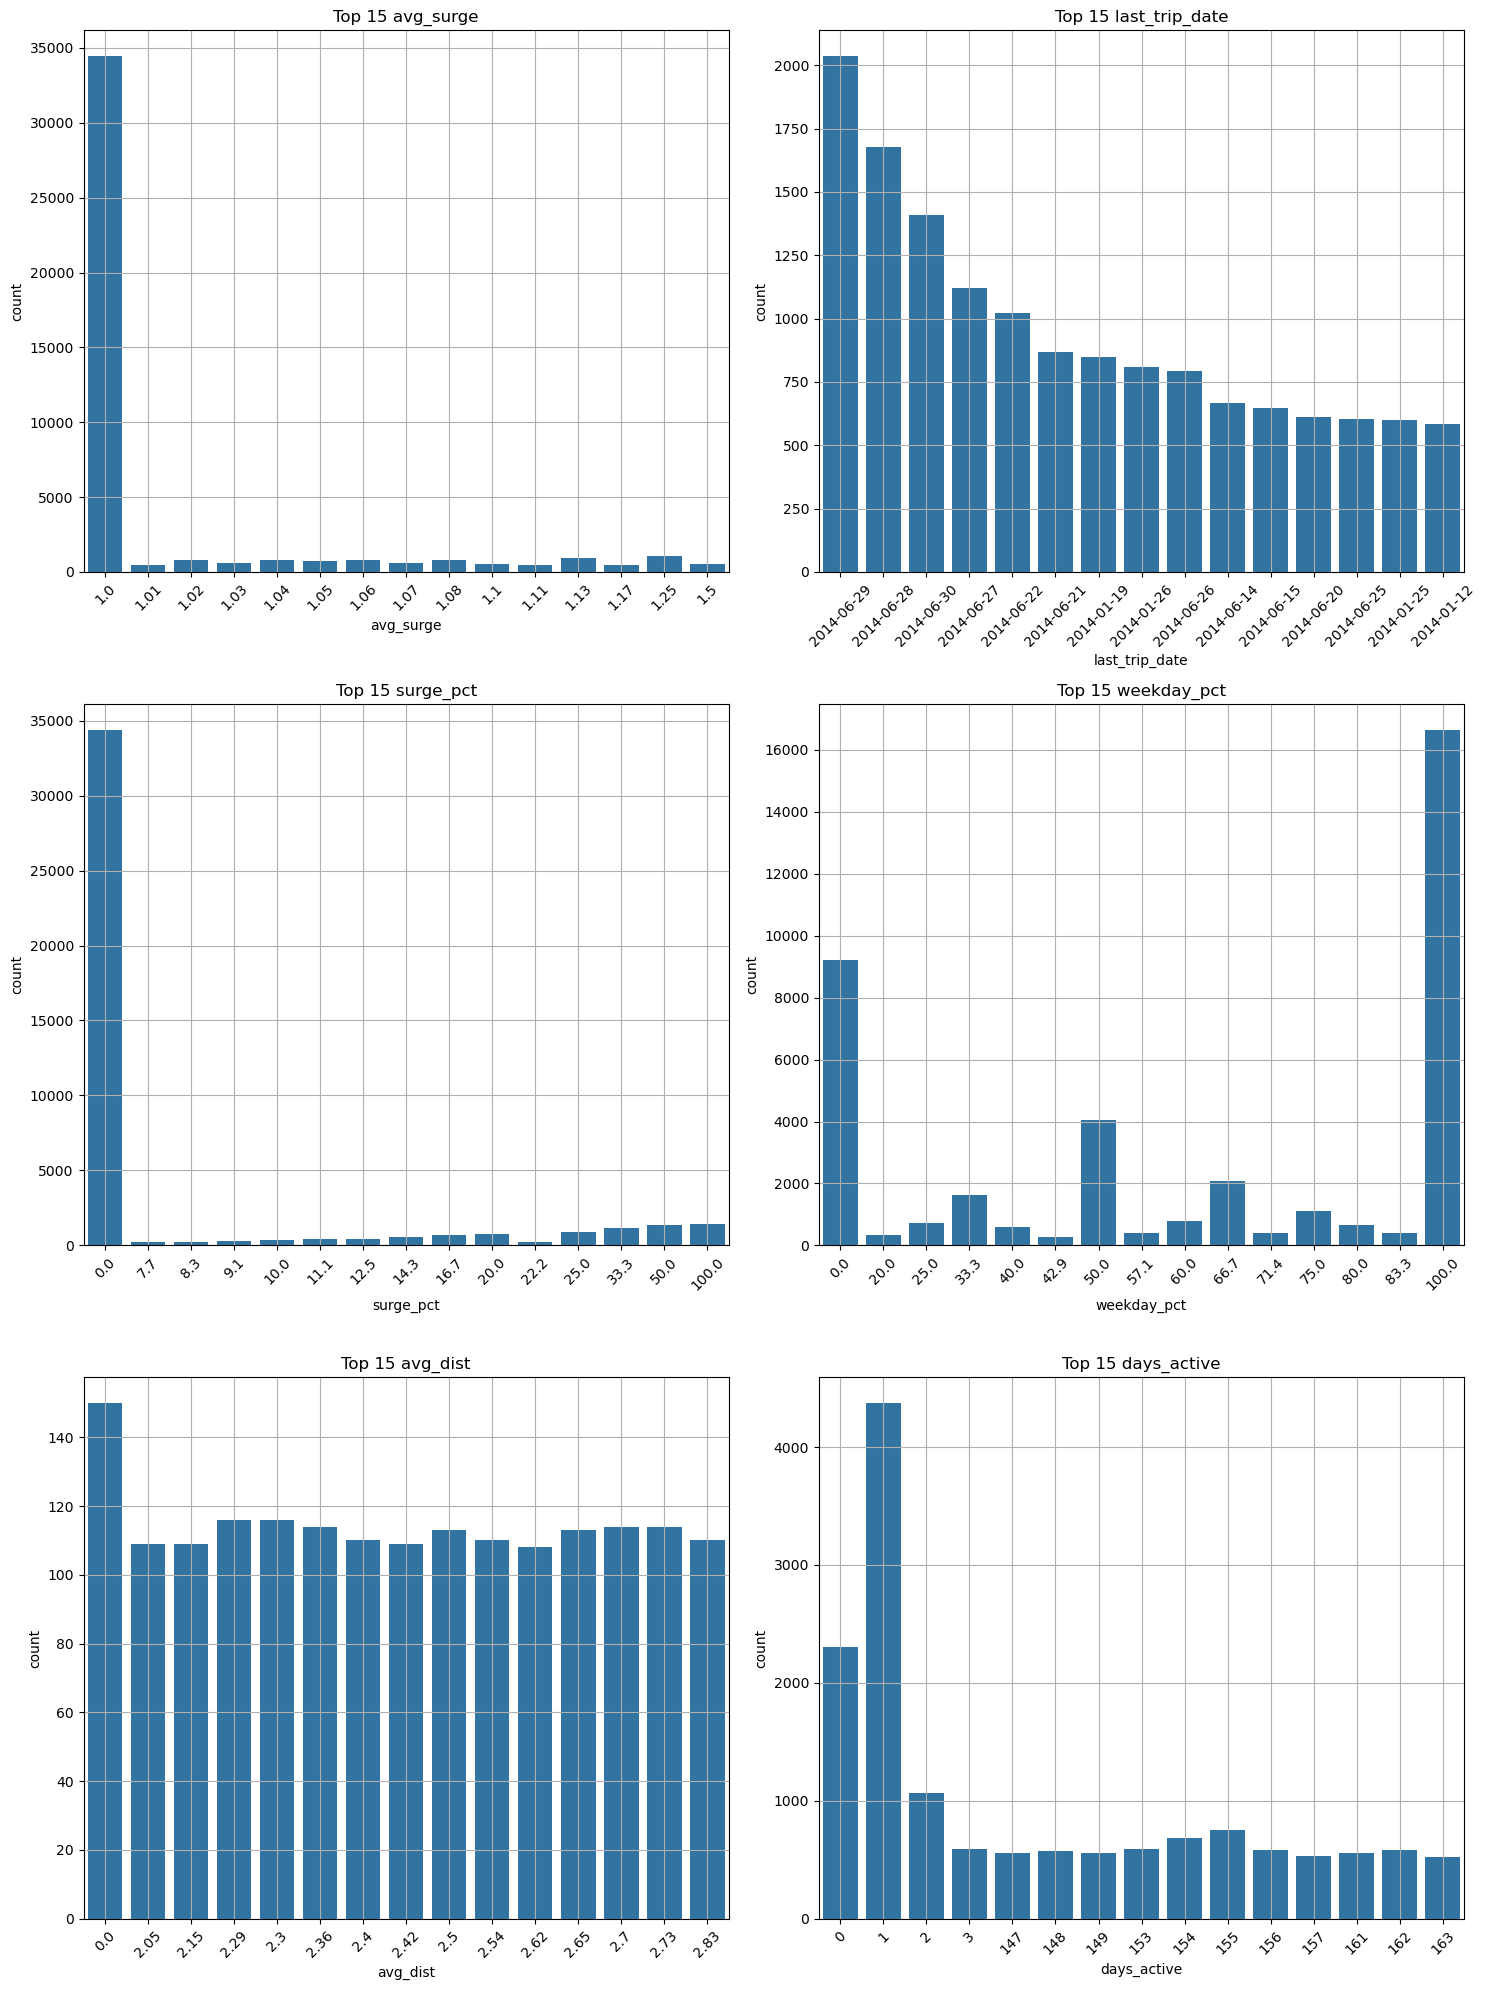

In [50]:
# Histograms of 6 varied features
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Reduce before making histograms
# Just take their top numbers
columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

c=0
for i in range(3):
    for j in range(2):
        df2_temp = pd.DataFrame(df2[columns[c]].value_counts().head(15)).reset_index()

        sns.barplot(data=df2_temp, x=columns[c], y='count', ax=axes[i, j])
        axes[i, j].title.set_text("Top 15 " + columns[c])     
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].grid(True)
        c += 1

plt.tight_layout()
plt.show()

In [382]:
# Fraction of retained users
len(df2[df2['retained']==True])/len(df2)*100

69.22

### Part B: A closer look at the data

In [52]:
# Are there ultimate_black_user who has 0 for trips_in_first_30_days?

df2_temp = df2[['ultimate_black_user', 'trips_in_first_30_days', 'retained']]

df2_black = df2_temp[df2_temp['ultimate_black_user']==True]
df2_black['retained'].value_counts()

# There are 5379 Ultimate Black Users who are not considered 'retained'. This doesn't make sense to me.

# df2 of all Ultimate Black Users who are not considered 'retained'
df2_unretained_black = df2[(df2['retained']==False) & (df2['ultimate_black_user']==True)]
df2_unretained_black

city  trips_in_first_30_days signup_date  \
17     King's Landing                       0  2014-01-12   
23     King's Landing                       0  2014-01-21   
68     King's Landing                       0  2014-01-01   
79            Astapor                       0  2014-01-23   
84            Astapor                       0  2014-01-09   
...               ...                     ...         ...   
49959      Winterfell                       0  2014-01-04   
49971  King's Landing                       0  2014-01-12   
49979      Winterfell                       0  2014-01-24   
49981         Astapor                       0  2014-01-26   
49997      Winterfell                       0  2014-01-31   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
17                      3.9        1.0     2014-07-01   iPhone        0.0   
23                      5.0        1.0     2014-06-13  Android        0.0   
68                      5.0        1.0     2014-06-15   iPhone        0.0   
79                      5.0        1.0     2014-06-01  Android        0.0   
84                      4.0        1.0     2014-06-30   iPhone        0.0   
...                     ...        ...            ...      ...        ...   
49959                   4.0        1.0     2014-06-26  Android        0.0   
49971                   NaN        1.0     2014-06-14   iPhone        0.0   
49979                   4.0        1.0     2014-04-07  Android        0.0   
49981                   4.0        1.0     2014-03-16   iPhone        0.0   
49997                   5.0        1.0     2014-05-22  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
17                    True         95.2      2.38                   4.8   
23                    True        100.0      7.74                   5.0   
68                    True          0.0      4.44                   5.0   
79                    True         66.7     10.49                   5.0   
84                    True        100.0      5.01                   5.0   
...                    ...          ...       ...                   ...   
49959                 True        100.0     12.48                   5.0   
49971                 True        100.0      4.69                   5.0   
49979                 True         50.0      3.81                   4.8   
49981                 True          0.0      5.49                   5.0   
49997                 True        100.0      3.86                   5.0   

       retained  days_active  signup_dayofweek  
17        False          170                 6  
23        False          143                 1  
68        False          165                 2  
79        False          129                 3  
84        False          172                 3  
...         ...          ...               ...  
49959     False          173                 5  
49971     False          153                 6  
49979     False           73                 4  
49981     False           49                 6  
49997     False          111                 4  

[5379 rows x 15 columns]

In [53]:
# Histograms of 6 basic features for Unretained Ultimate Black Users
# fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# columns = ['city', 'signup_date', 'avg_rating_of_driver', 'phone', 'avg_rating_by_driver', 'signup_dayofweek']

# c=0
# for i in range(3):
#     for j in range(2):
#         # if c != 9:
#             sns.histplot(data=df2_unretained_black, x=columns[c], ax=axes[i, j])
#             axes[i, j].title.set_text(columns[c])
#             axes[i, j].tick_params(axis='x', rotation=45)
#             axes[i, j].grid(True)
#             c += 1

# plt.tight_layout()
# plt.show()

# Nothing seems out of the ordinary or differs from the larger df2 dataset.....

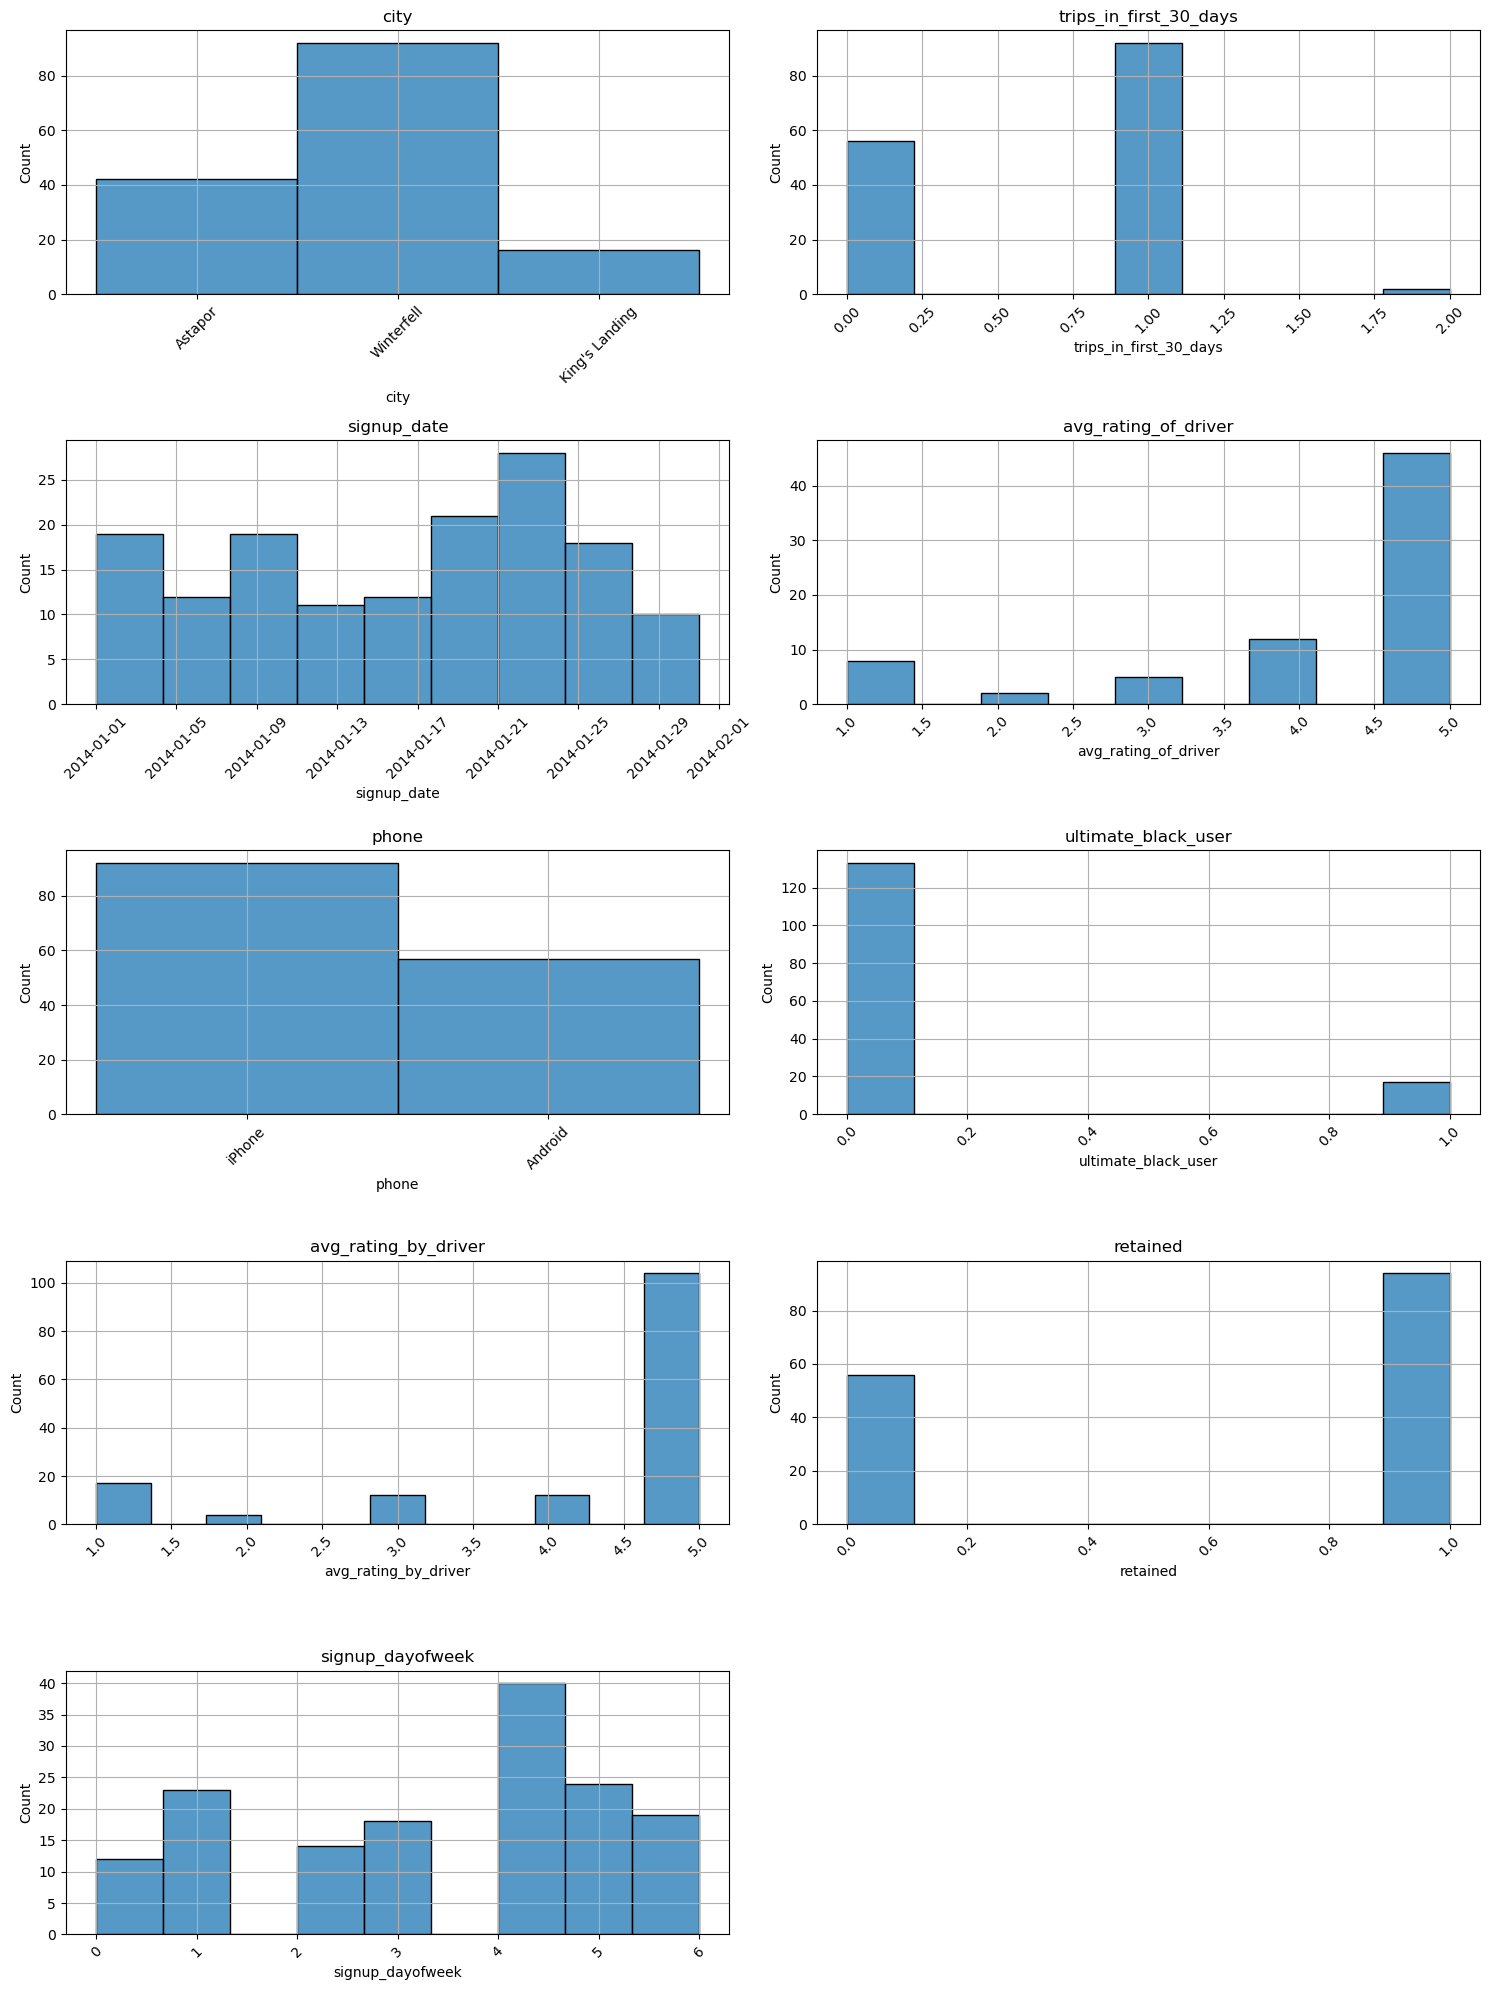

In [54]:
# How can 'avg_dist' be 0.0? Unless they never used the app
df2_temp = df2[df2['avg_dist']==0.0]

# Histograms of basic features for those with avg_dist of 0
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

columns = ['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'phone', 'ultimate_black_user', 'avg_rating_by_driver', 'retained', 'signup_dayofweek']

# Reduce these columns before plotting
# columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

c=0
for i in range(5):
    for j in range(2):
        if c != 9:
            sns.histplot(data=df2_temp, x=columns[c], ax=axes[i, j])
            axes[i, j].title.set_text(columns[c])
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            c += 1

fig.delaxes(axes[4, 1])
plt.tight_layout()
plt.show()

# Winterfell seems to dominate and deviate from the large dataset... Seems like a correlation between Winterfell and shorter distances.
# When avg_dist = 0, trips_in_first_30_days is between 0-2.
# Underrepresentation of Ultimate Black users

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
2817   Winterfell                       0  2014-01-02                   5.0   
13861  Winterfell                       1  2014-01-01                   1.0   
19191  Winterfell                       1  2014-01-10                   5.0   
21894  Winterfell                       1  2014-01-10                   NaN   
30477  Winterfell                       1  2014-01-01                   5.0   
47052  Winterfell                       1  2014-01-09                   NaN   
49383  Winterfell                       1  2014-01-10                   NaN   

       avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
2817        5.00     2014-02-05   iPhone      100.0                False   
13861       8.00     2014-01-01   iPhone      100.0                False   
19191       5.00     2014-01-11  Android      100.0                False   
21894       5.00     2014-01-11  Android      100.0            

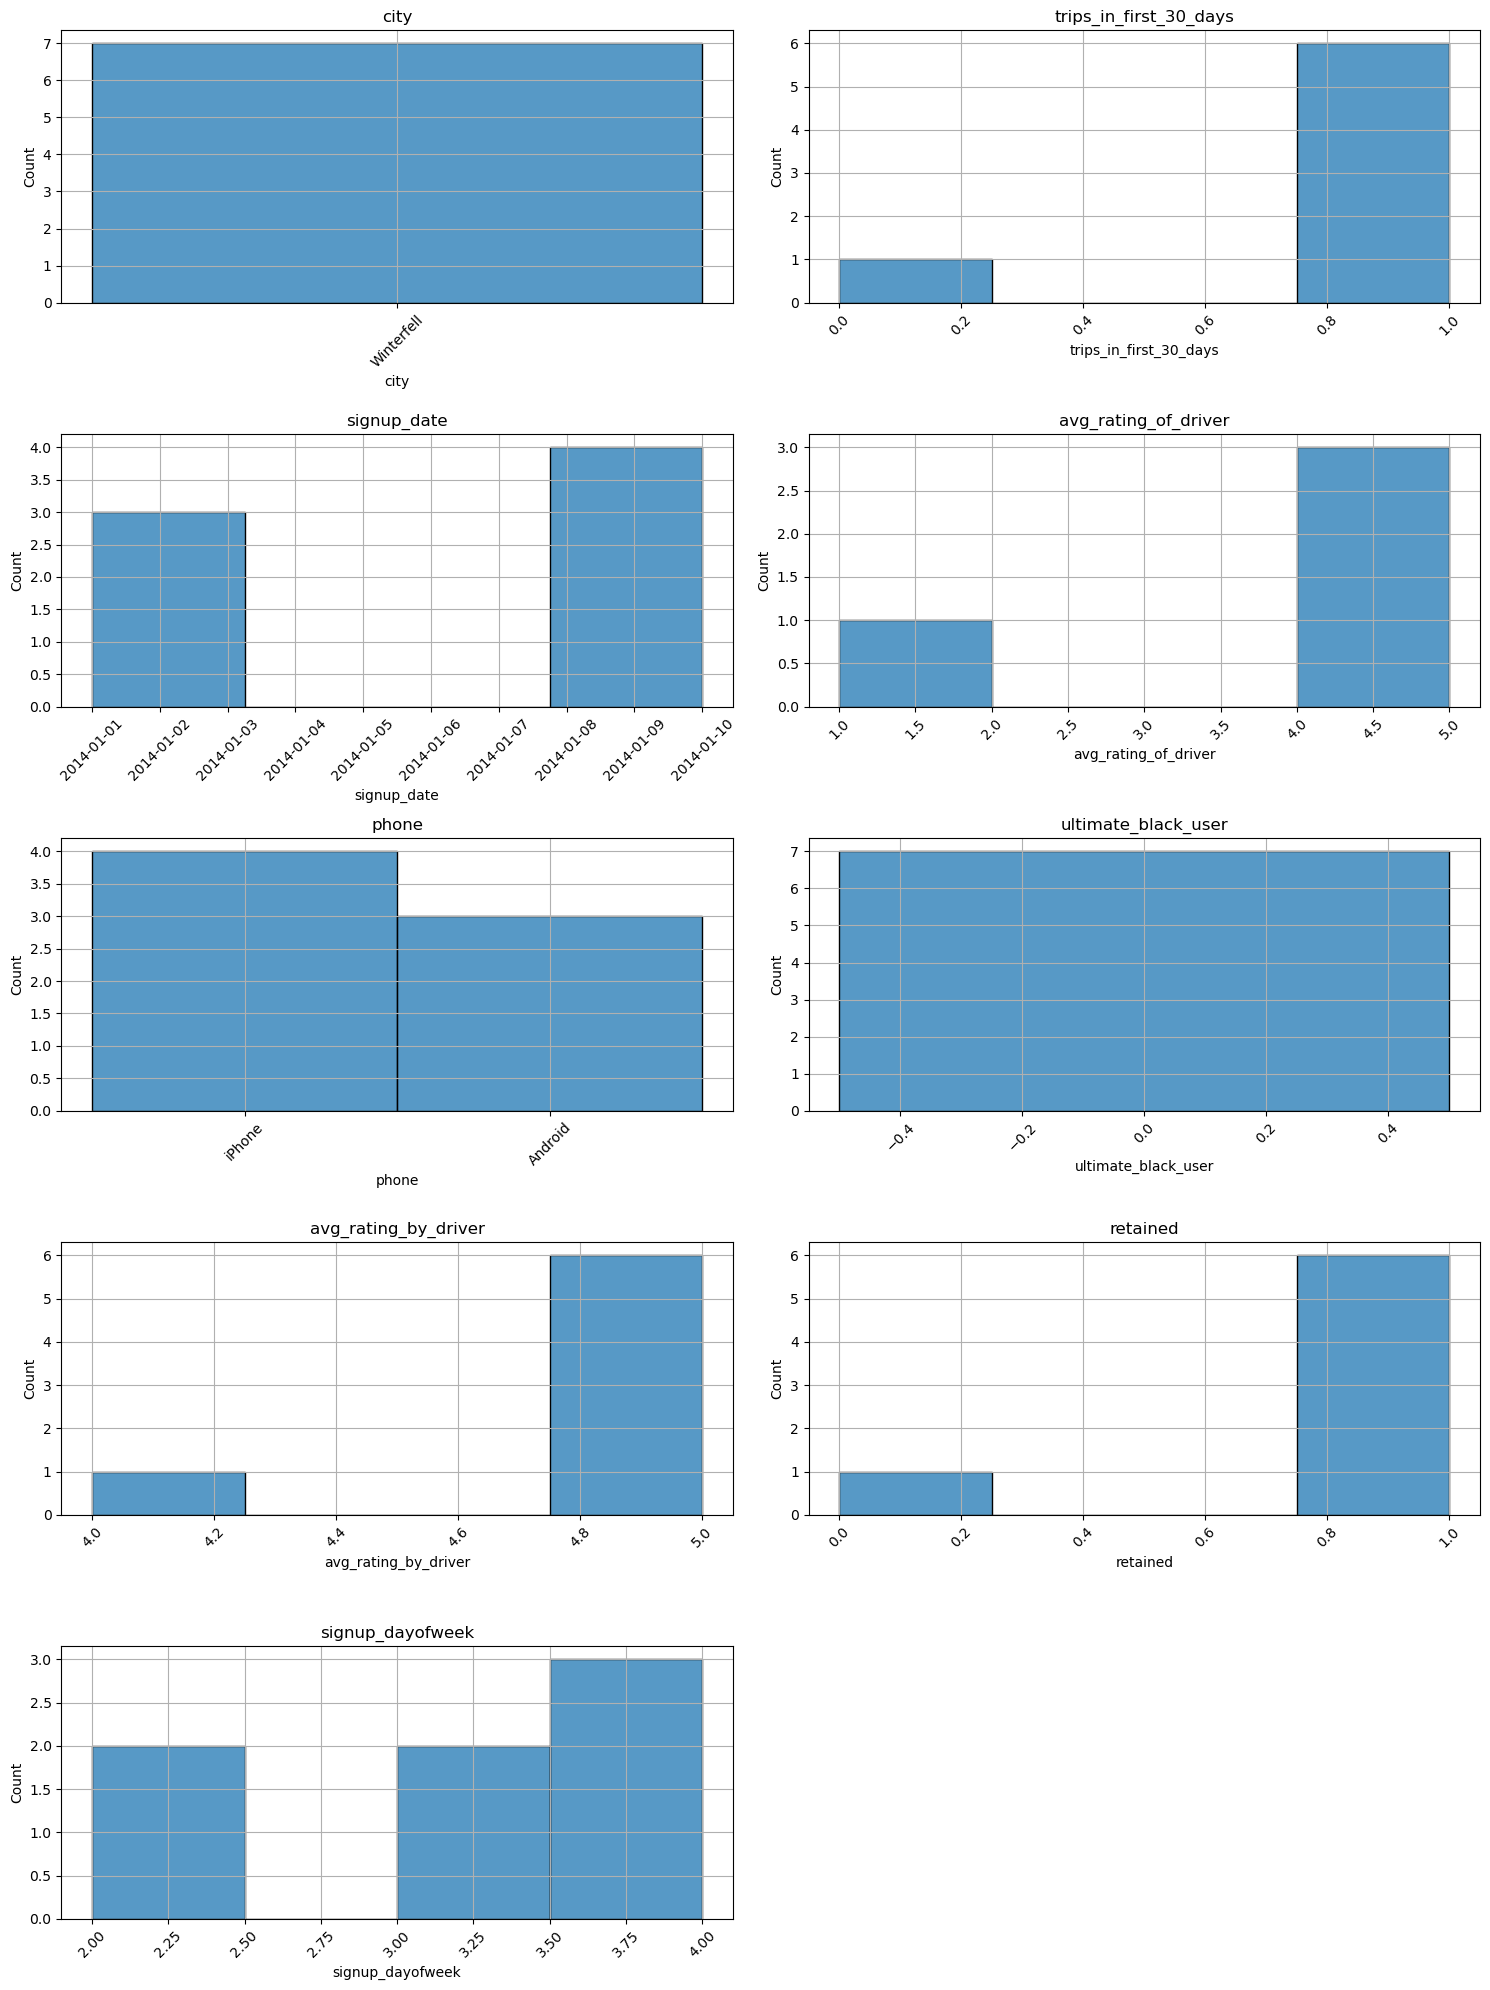

In [55]:
# How can you have an 'avg_surge' if you never took an ride? 
# Maybe they took a trip after 30 days....
# 'avg_surge': The average surge multiplier over all of this user’s trips
# Min: 1.0; Max: 8.0; Avg: 1.07
# Seems like most of them are 1.0 or very close to 1.0
# Pretty rare to be higher. 
# Let's look at the super high surges too

df2['avg_surge'].describe()

# Looking closer at clients who have an avg_surge of 3+
df2_surge = df2[df2['avg_surge']>=5]
print(df2_surge)

# Histograms of basic features for those with avg_dist of 0
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

columns = ['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'phone', 'ultimate_black_user', 'avg_rating_by_driver', 'retained', 'signup_dayofweek']

# Reduce these columns before plotting
# columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

c=0
for i in range(5):
    for j in range(2):
        if c != 9:
            sns.histplot(data=df2_surge, x=columns[c], ax=axes[i, j])
            axes[i, j].title.set_text(columns[c])
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            c += 1

fig.delaxes(axes[4, 1])
plt.tight_layout()
plt.show()

# Winterfell and Astapor overrepresented. I'm starting to think Winterfell is the main city.

In [56]:
# Are there any with 0 days active? Can we confirm how many accounts signed up, and took a ride over 30 days later? How many signed up and never took a ride? <-- Helpful distinction
df2['days_active'].value_counts()

# sns.histplot(data=df2, x='days_active')
# plt.show()

df_0daysactive = df2[df2['days_active']==0]
columns = df_0daysactive.columns

for c in columns:
    print(df_0daysactive[c].value_counts())
    print("")

# 2118 took 1 trip, 173 took 2, 9 took 3, 1 took 4, 1 took 5 trips. All in 1 day. These are our single-day users.
# There aren't any who didn't take any rides. (However, there are 19 with avg_dist of 0.00 and 10 with avg_dist of 0.01. Confusing.

city
Winterfell        1205
Astapor            883
King's Landing     214
Name: count, dtype: int64

trips_in_first_30_days
1    2118
2     173
3       9
5       1
4       1
Name: count, dtype: int64

signup_date
2014-01-19    158
2014-01-25    146
2014-01-26    144
2014-01-18    132
2014-01-01    128
2014-01-11    113
2014-01-12    112
2014-01-20     80
2014-01-02     78
2014-01-17     77
2014-01-24     72
2014-01-05     70
2014-01-31     69
2014-01-10     68
2014-01-23     67
2014-01-07     64
2014-01-06     61
2014-01-30     59
2014-01-08     56
2014-01-16     54
2014-01-27     53
2014-01-29     51
2014-01-04     51
2014-01-09     48
2014-01-22     46
2014-01-21     46
2014-01-15     45
2014-01-28     44
2014-01-14     38
2014-01-03     37
2014-01-13     35
Name: count, dtype: int64

avg_rating_of_driver
5.0    1066
4.0     247
3.0      59
1.0      29
4.5      19
2.0      17
3.5       3
4.7       1
4.8       1
3.7       1
Name: count, dtype: int64

avg_surge
1.00    2103
1.25      5

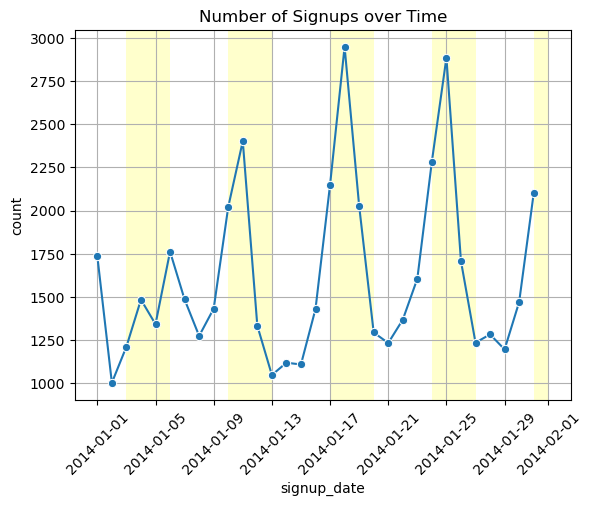

In [57]:
# Make a line plot based on signup_date to see if there are any trends. How many people signed up on each day?

df_signup_date = pd.DataFrame(df2['signup_date'].value_counts()).reset_index().sort_values(by='signup_date')
df_signup_date

type(df_signup_date['signup_date'][0]) # type: pandas._libs.tslibs.timestamps.Timestamp

ax = sns.lineplot(data=df_signup_date, x='signup_date', y='count', marker='o')
ax.tick_params(axis='x', rotation=45)

for date in df_signup_date.signup_date:
    # print(date)
    if date.dayofweek >= 4:  # Friday (4), Saturday (5), or Sunday (6)
        ax.axvspan(date, date + pd.Timedelta(days=1), color='yellow', alpha=0.2, lw=0)

plt.title("Number of Signups over Time")
plt.grid(True)
plt.show()

# Tendences to grow on Fridays and peak on Saturdays. 
# One Monday small peak anomoly.
# Lowest days tend to be Mon-Wed.

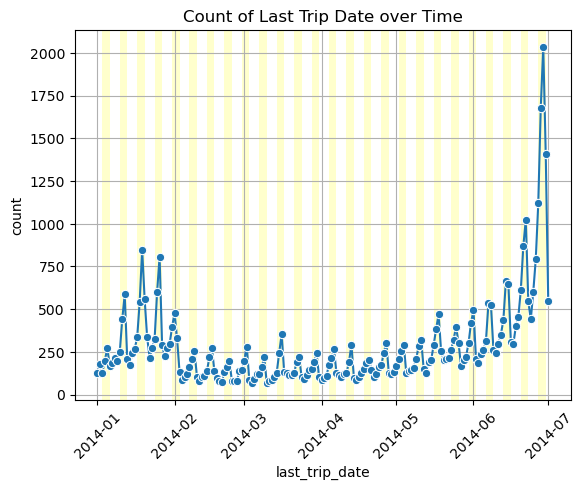

In [58]:
# Make a line plot based on last_trip_date to see if there are any trends

df_last_trip_date = pd.DataFrame(df2['last_trip_date'].value_counts()).reset_index().sort_values(by='last_trip_date')
df_last_trip_date

type(df_last_trip_date['last_trip_date'][0]) # type: pandas._libs.tslibs.timestamps.Timestamp

ax = sns.lineplot(data=df_last_trip_date, x='last_trip_date', y='count', marker='o')
ax.tick_params(axis='x', rotation=45)

for date in df_last_trip_date.last_trip_date:
    # print(date)
    if date.dayofweek >= 4:  # Friday (4), Saturday (5), or Sunday (6)
        ax.axvspan(date, date + pd.Timedelta(days=1), color='yellow', alpha=0.2, lw=0)

plt.title("Count of Last Trip Date over Time")
plt.grid(True)
plt.show()

# I'm guessing there was a promotion in the month of January. There was a surge of new users who only used it once.
# But then Looking at the low count for Feburary - April, shows that many users continued to use it up to those months.
# There's a peak for June because these are the users who have used it recently. These are the users who signed up in January and have continued to use it.

# Is there a correlation beween these recent users and the title of 'retained'?

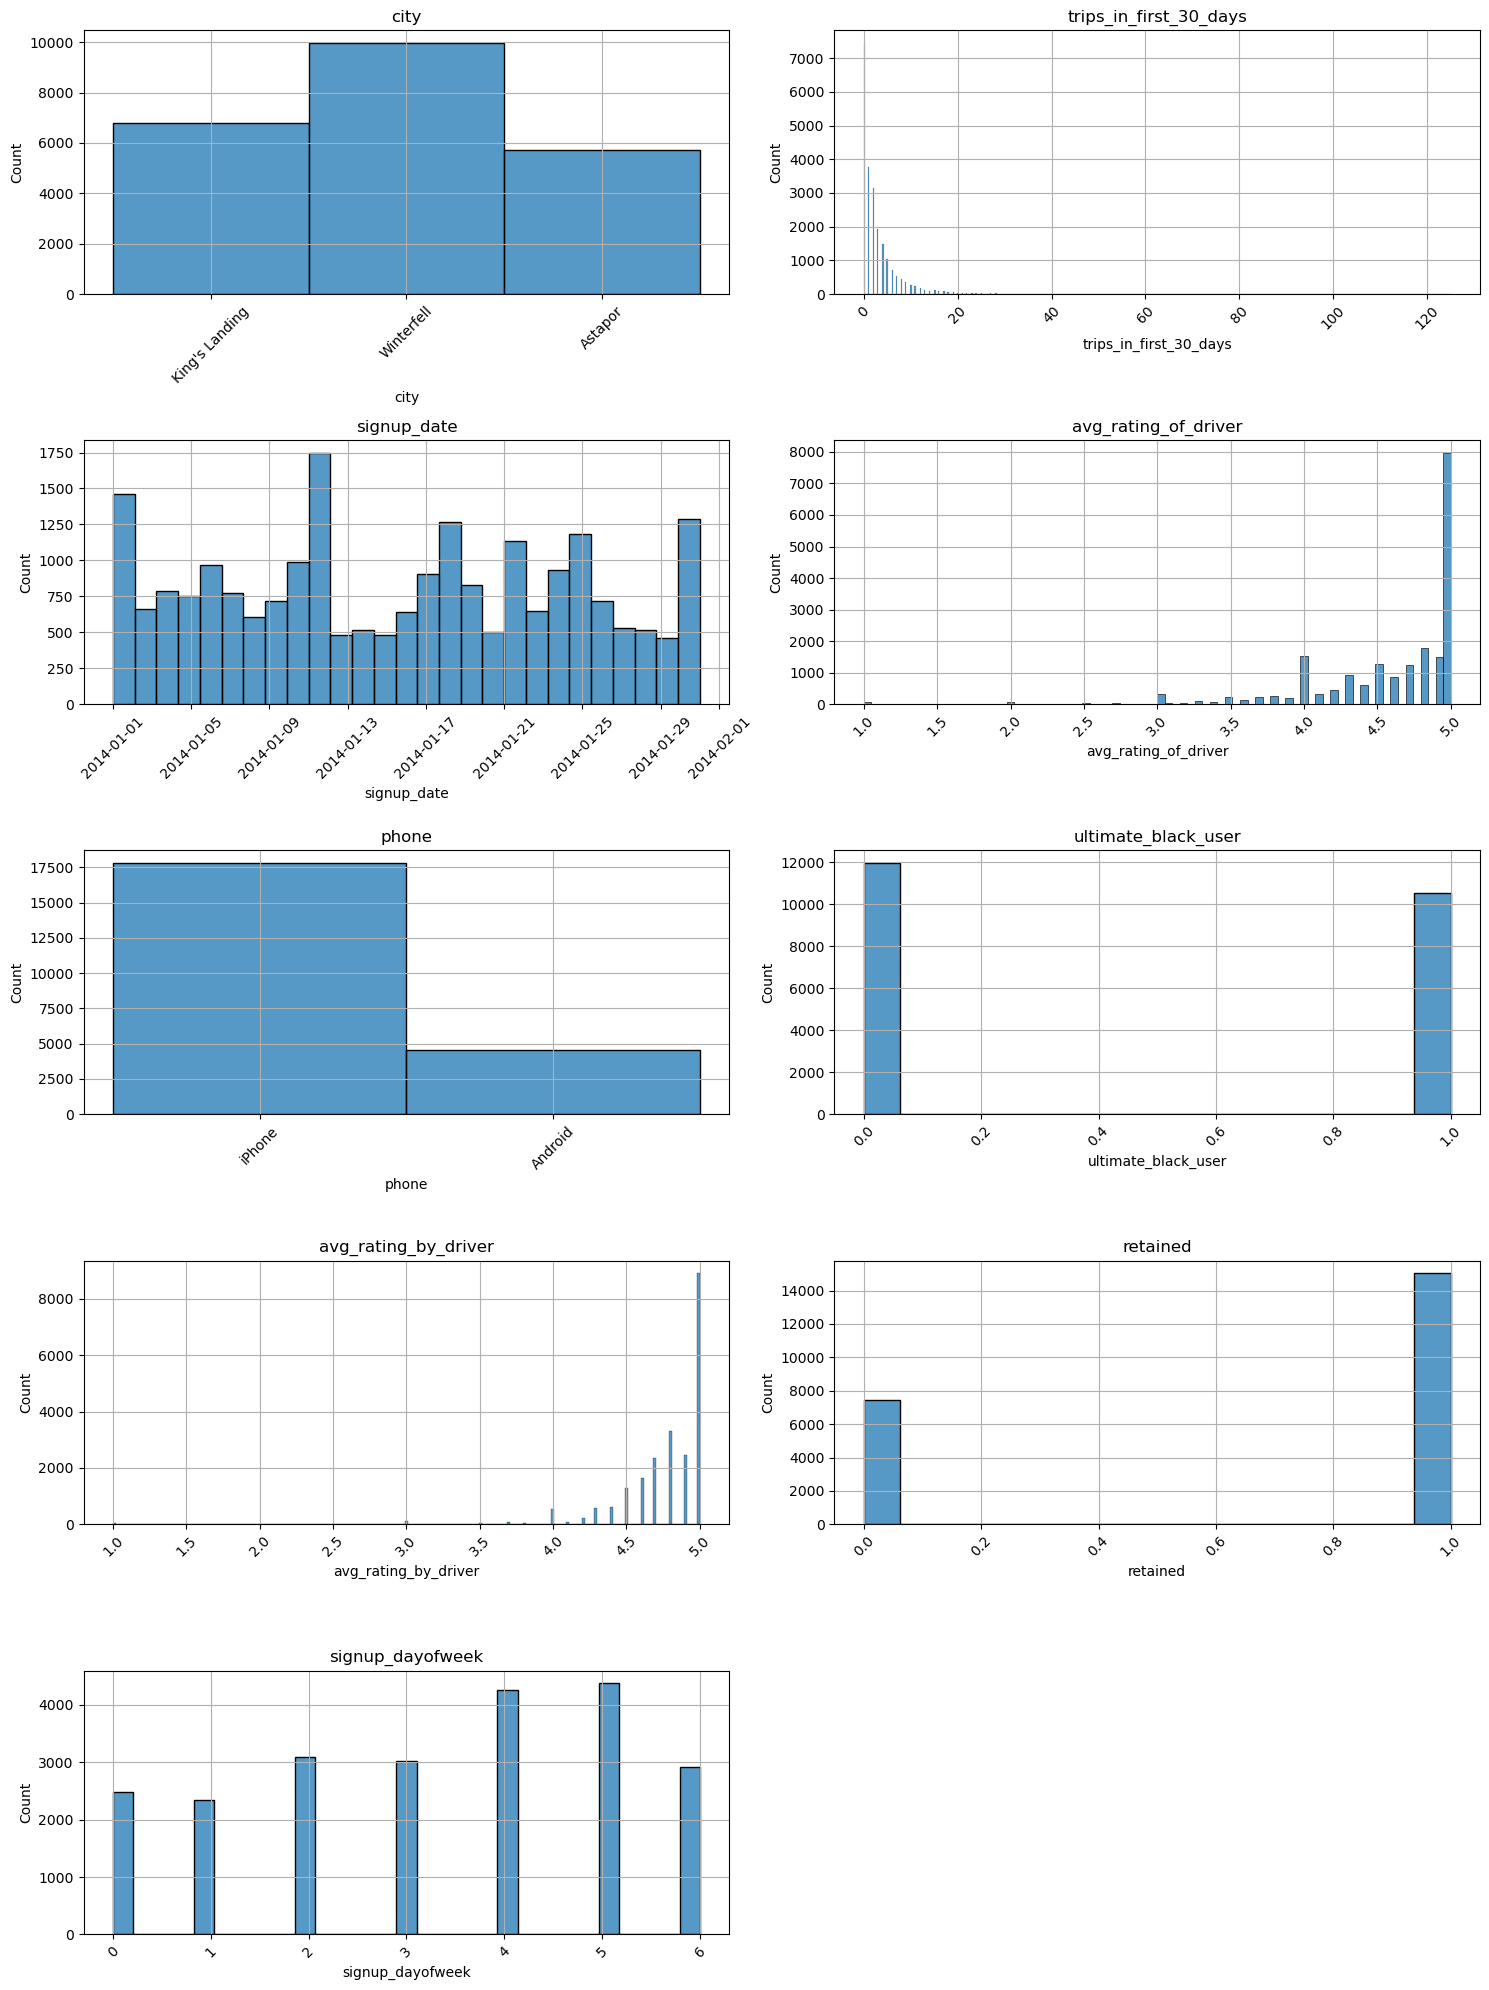

In [59]:
# Is there a correlation beween these recent users and the title of 'retained'?
df_recent_users = df2[df2['days_active']>120]
df_recent_users


# Histograms of basic features for those with avg_dist of 0
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

columns = ['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'phone', 'ultimate_black_user', 'avg_rating_by_driver', 'retained', 'signup_dayofweek']

# Reduce these columns before plotting
# columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

c=0
for i in range(5):
    for j in range(2):
        if c != 9:
            sns.histplot(data=df_recent_users, x=columns[c], ax=axes[i, j])
            axes[i, j].title.set_text(columns[c])
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            c += 1

fig.delaxes(axes[4, 1])
plt.tight_layout()
plt.show()

# Some of these users didn't take a trip within first 30 days...but then they still are very active down the line. Explore this further.

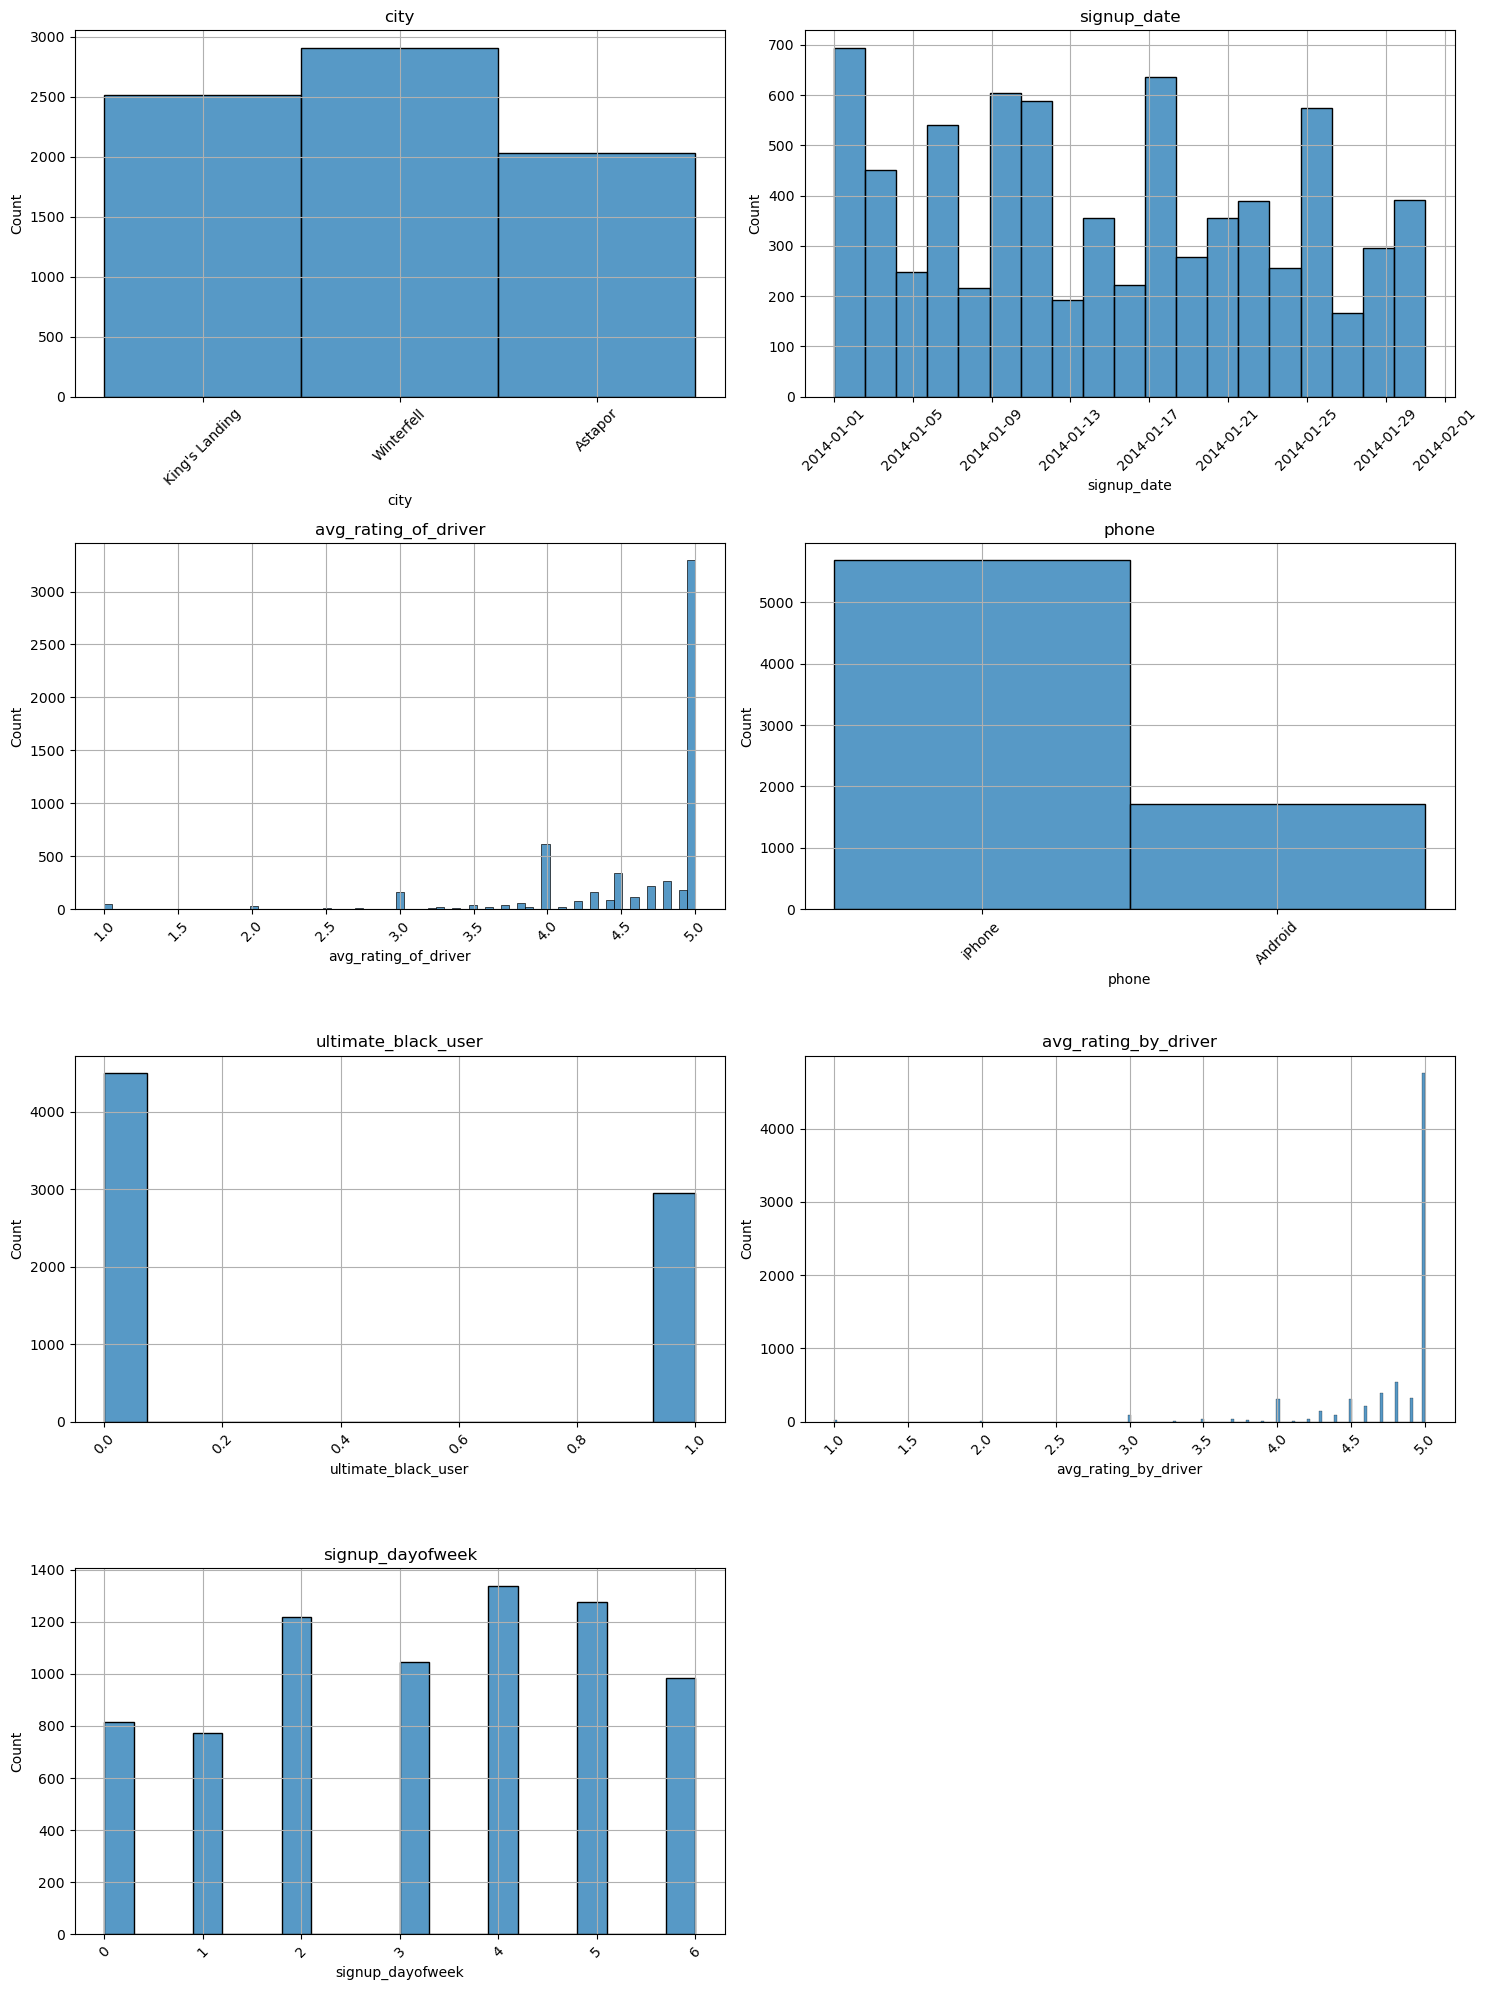

In [60]:
# Some of these users didn't take a trip within first 30 days...but then they still are very active down the line. Explore this further.
df_unretained_recent = df_recent_users[df_recent_users['retained']==False]
df_unretained_recent

# Histograms of basic features for those with avg_dist of 0
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

columns = ['city', 'signup_date', 'avg_rating_of_driver', 'phone', 'ultimate_black_user', 'avg_rating_by_driver', 'signup_dayofweek']

# Reduce these columns before plotting
# columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

c=0
for i in range(4):
    for j in range(2):
        if c != 7:
            sns.histplot(data=df_unretained_recent, x=columns[c], ax=axes[i, j])
            axes[i, j].title.set_text(columns[c])
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            c += 1

fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()

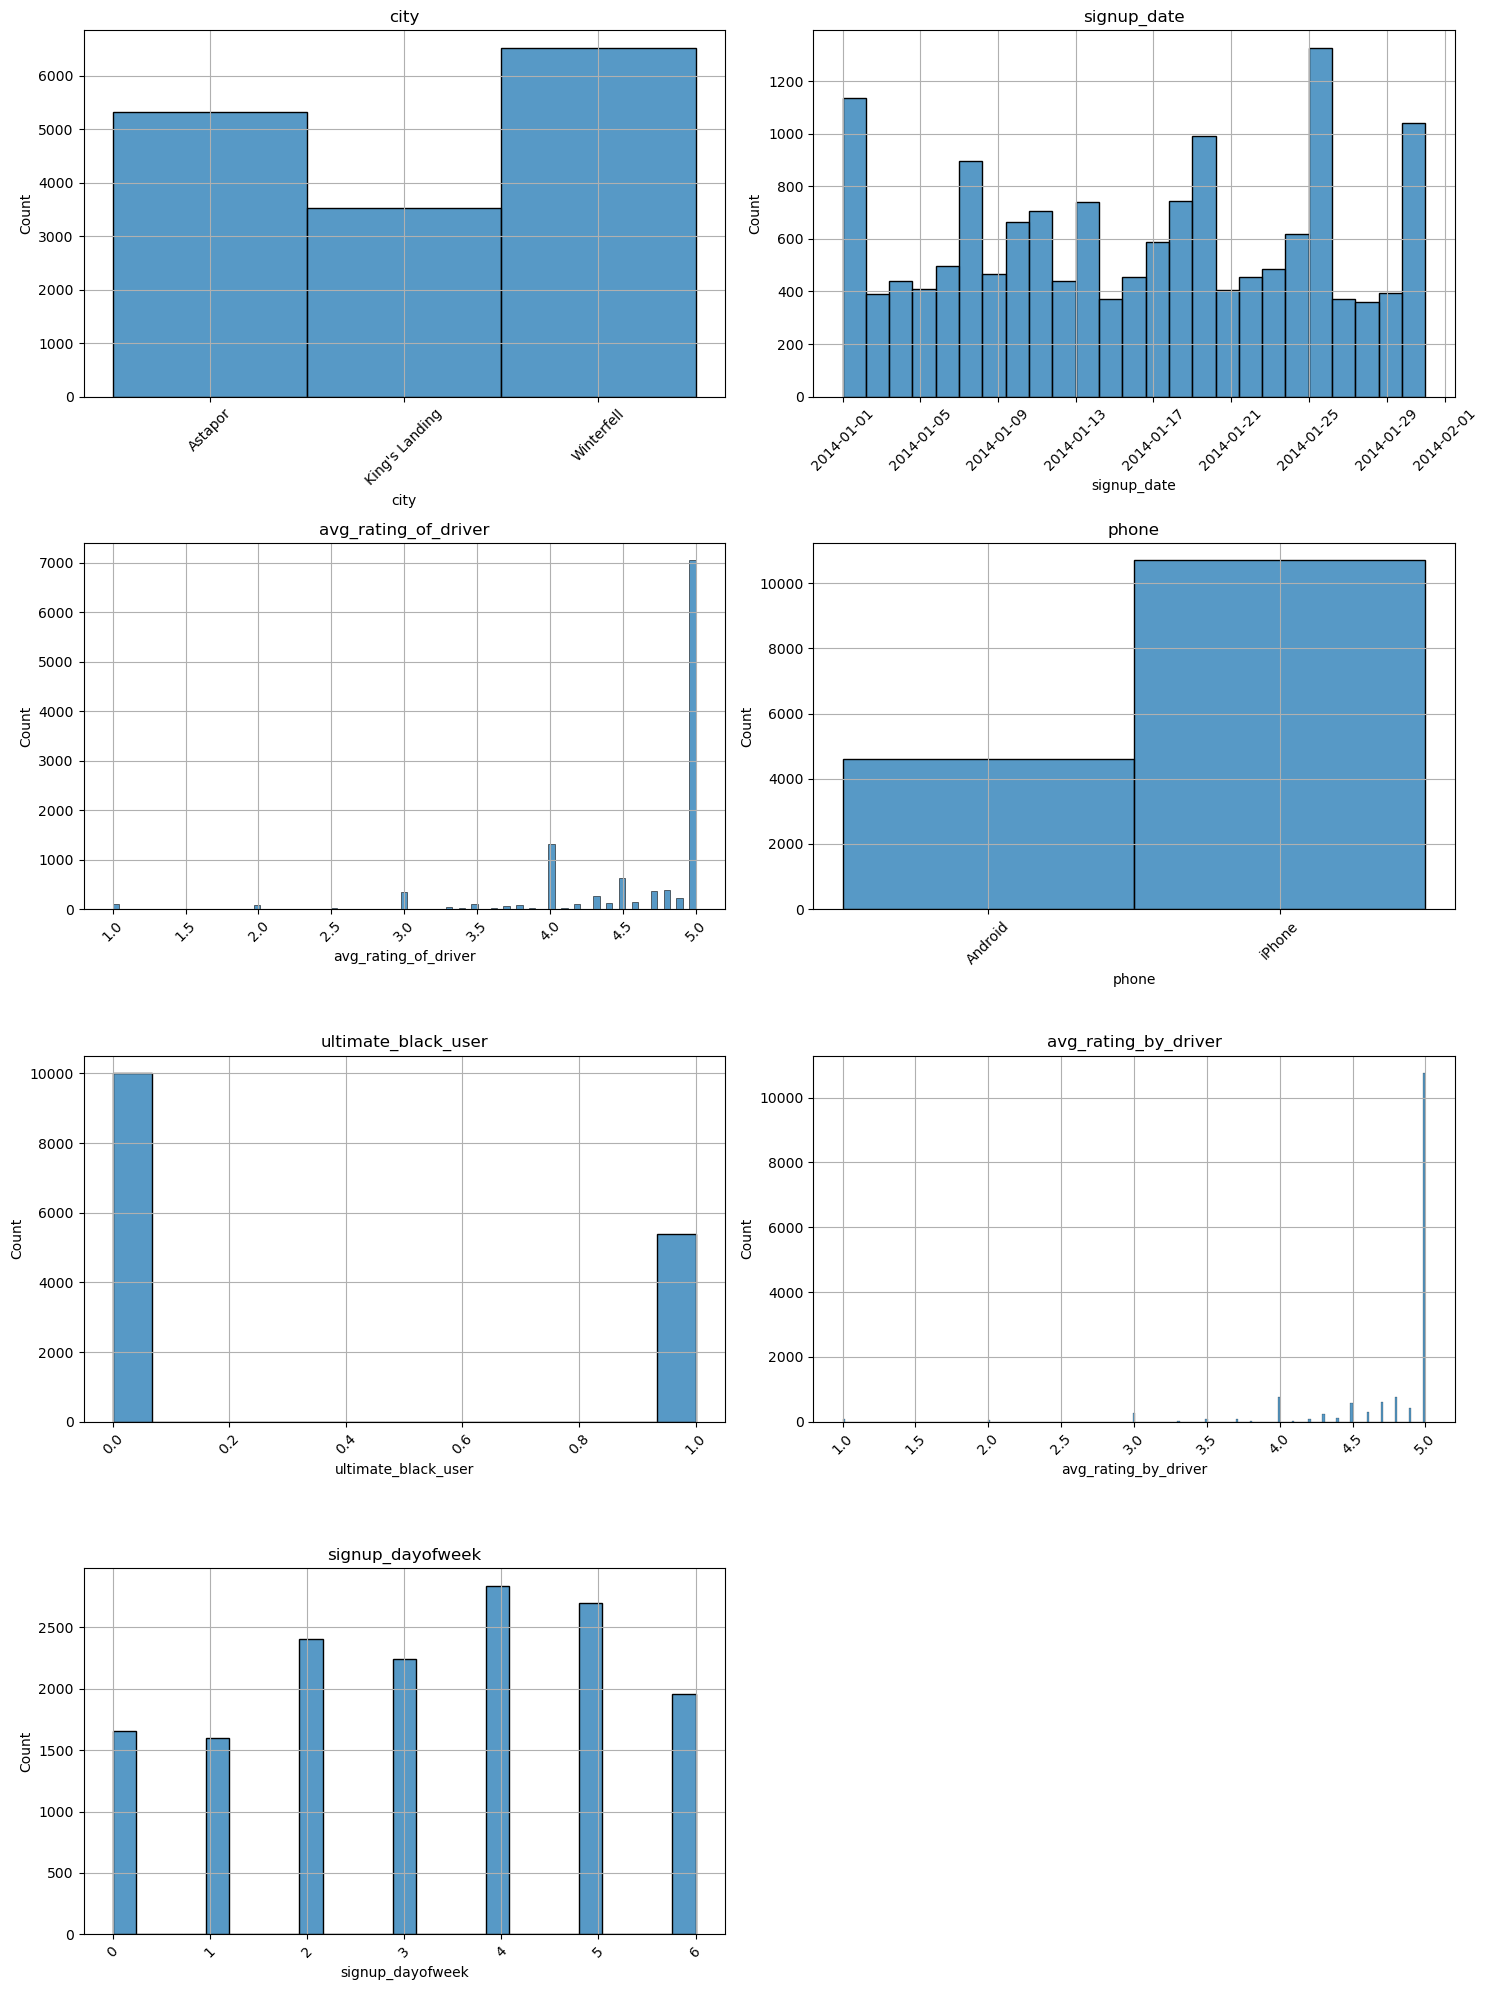

In [61]:
# How many have 0 trips in first 30 days but have DEFINITELY taken a trip?
df_unretained = df2[df2['trips_in_first_30_days']==0]
df_unretained

# Histograms of basic features for those with avg_dist of 0
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# All columns: ['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'retained', 'days_active', 'signup_dayofweek']

columns = ['city', 'signup_date', 'avg_rating_of_driver', 'phone', 'ultimate_black_user', 'avg_rating_by_driver', 'signup_dayofweek']

# Reduce these columns before plotting
# columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

c=0
for i in range(4):
    for j in range(2):
        if c != 7:
            sns.histplot(data=df_unretained, x=columns[c], ax=axes[i, j])
            axes[i, j].title.set_text(columns[c])
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].grid(True)
            c += 1

fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()

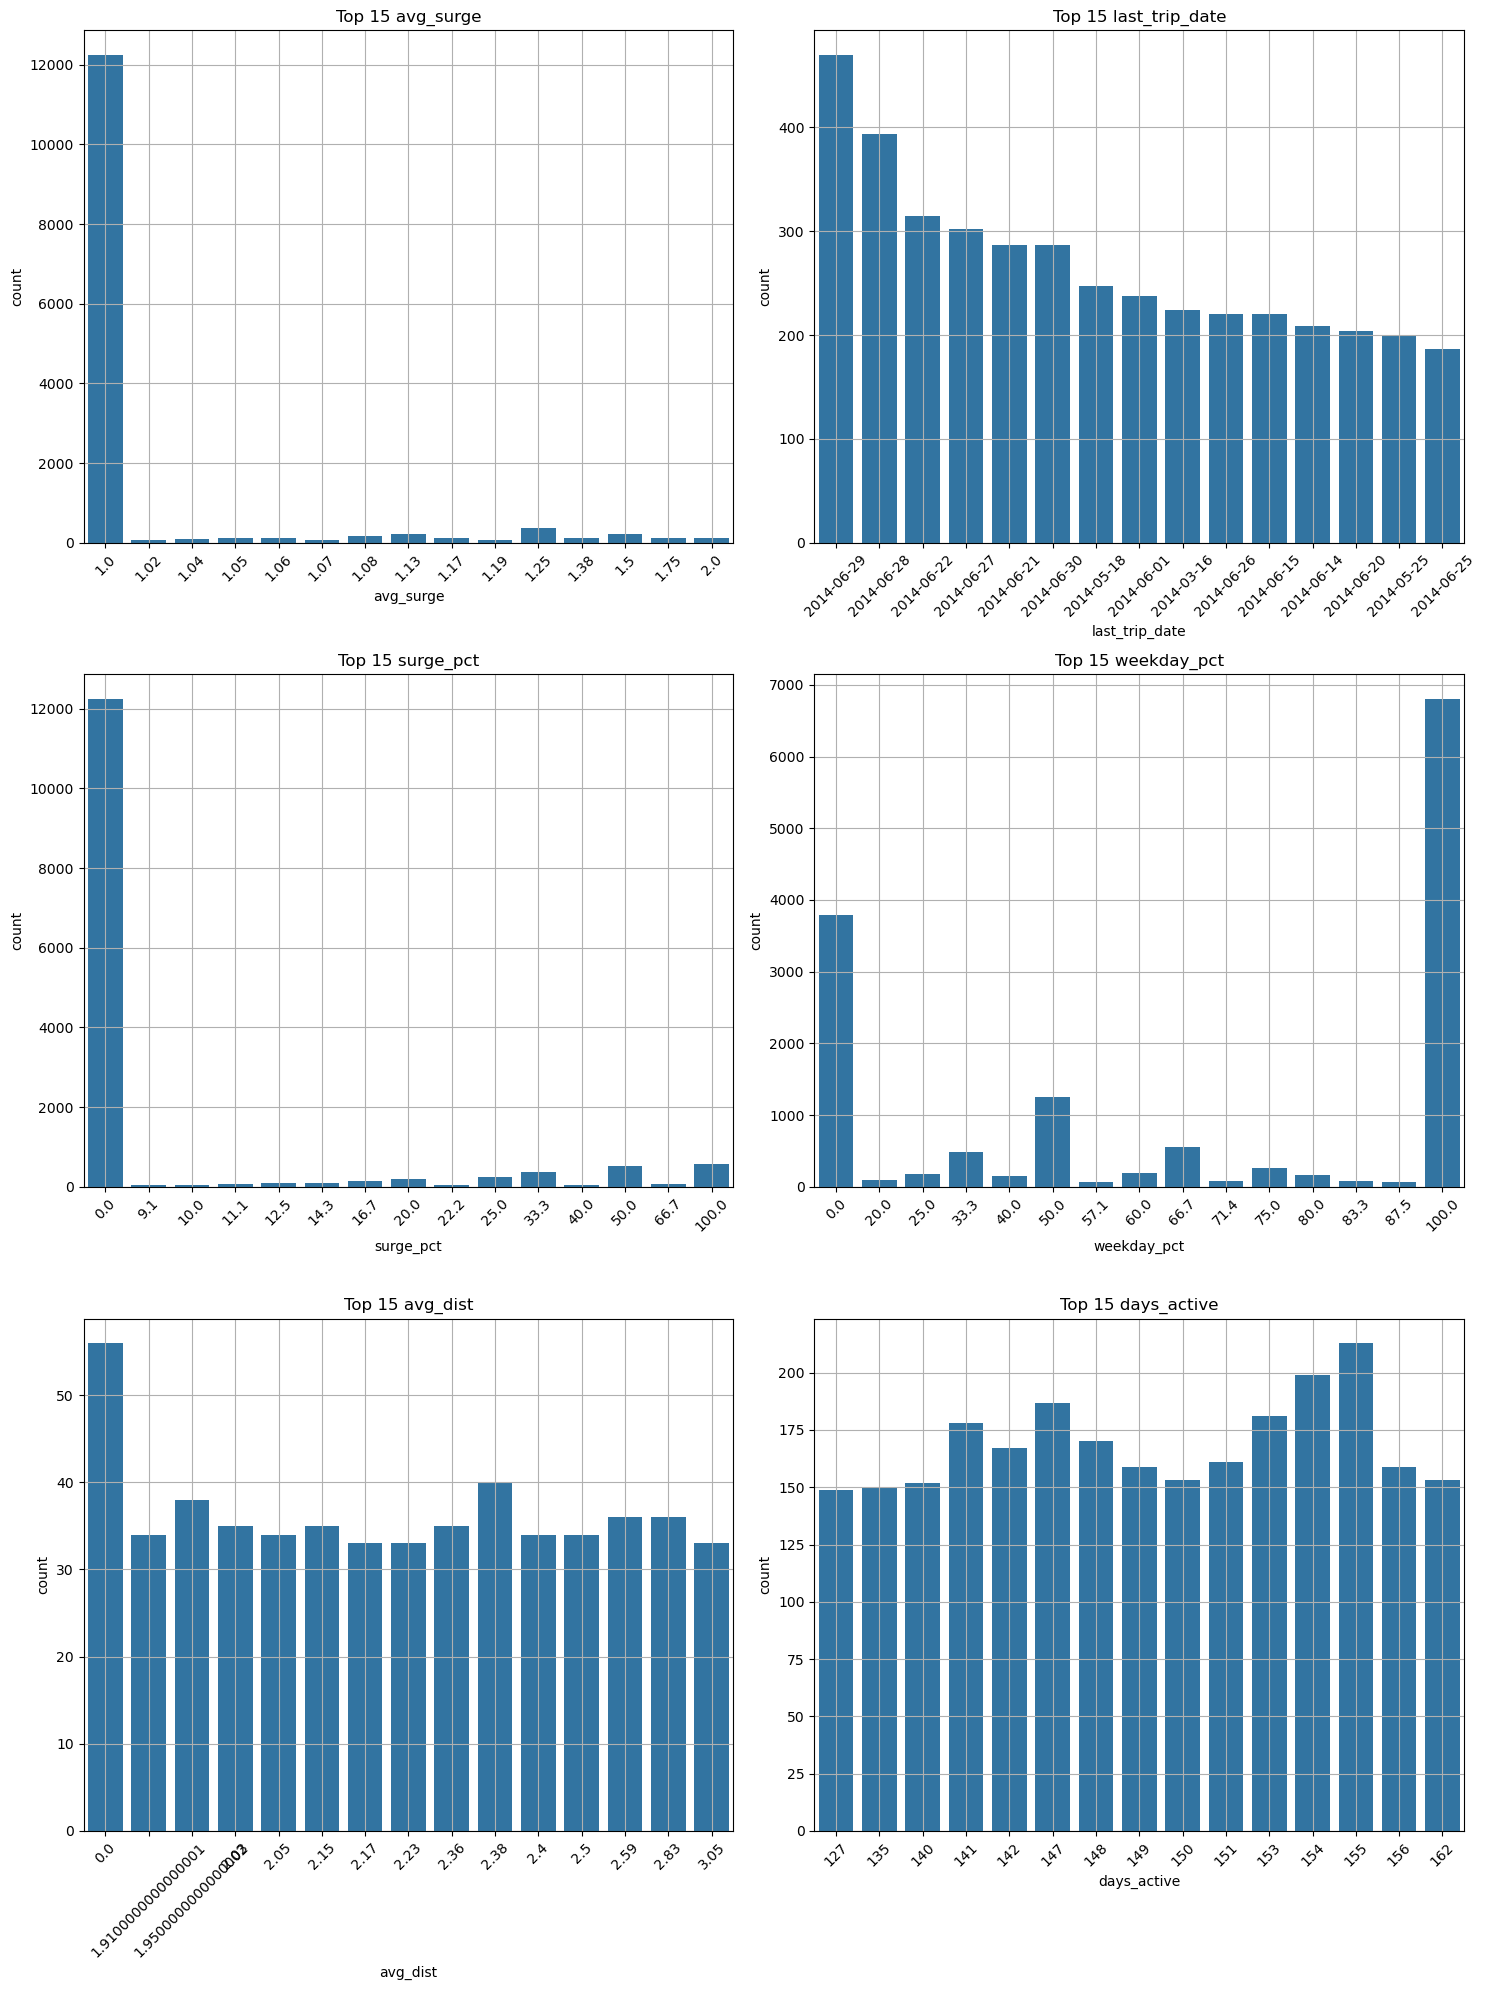

In [62]:
# Histograms of 6 varied features
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Reduce before making histograms
# Just take their top numbers
columns = ['avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist', 'days_active']

c=0
for i in range(3):
    for j in range(2):
        df2_temp = pd.DataFrame(df_unretained[columns[c]].value_counts().head(15)).reset_index()

        sns.barplot(data=df2_temp, x=columns[c], y='count', ax=axes[i, j])
        axes[i, j].title.set_text("Top 15 " + columns[c])     
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].grid(True)
        c += 1

plt.tight_layout()
plt.show()

# There are plenty of 'unretained' users who have used this recently
# The highest 'avg_surge' is 2.0. This makes me think that these are the strategizers. The ones who took advantage of the promotion even if they didn't need it right away. 

In [63]:
# sns Pairplot correlation
# sns.pairplot(data=df2)
# plt.show()

In [64]:
# sns Pairplot correlation
# sns.pairplot(data=df2, hue='city')
# plt.show()

In [65]:
# sns Pairplot correlation
# sns.pairplot(data=df2, hue='retained')
# plt.show()

In [66]:
# df2_temp = df2[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'retained', 'days_active', 'signup_dayofweek']]

# df2_temp = df2[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'days_active', 'signup_dayofweek']]

# sns.heatmap(data=df2_temp, annot=True)
# plt.show()

### Part C: Pre-Processing, Modeling, Evaluation (Retention)
Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance

**One-hot encoding**

In [139]:
df2.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  retained  days_active  \
0         46.2      3.67                   5.0      True          143   
1         50.0      8.26                   5.0     False           96   
2        100.0      0.77                   5.0      True            1   
3         80.0      2.36                   4.9      True          170   
4         82.4      3.13                   4.9      True           47   

   signup_dayofweek  
0                 5  
1                 2  
2                 0  
3                 4  
4                 0

In [215]:
# Turn 'signup_date' and 'last_trip_date' into categories
df2['signup_M'] = df2['signup_date'].dt.month
df2['signup_D'] = df2['signup_date'].dt.day
df2['signup_weekend'] = False
df2['signup_weekend'] = df2['signup_weekend'].where(df2['signup_dayofweek']>=4, True) # Includes Fridays

df2['last_trip_M'] = df2['last_trip_date'].dt.month
df2['last_trip_D'] = df2['last_trip_date'].dt.day
df2['last_trip_dayofweek'] = df2['last_trip_date'].dt.dayofweek
df2['last_trip_weekend'] = False
df2['last_trip_weekend'] = df2['last_trip_weekend'].where(df2['last_trip_dayofweek']>=4, True) # Includes Fridays

df3 = df2.drop(['signup_date', 'last_trip_date'], axis=1)

In [217]:
df3.head()

city  trips_in_first_30_days  avg_rating_of_driver  avg_surge  \
0  King's Landing                       4                   4.7       1.10   
1         Astapor                       0                   5.0       1.00   
2         Astapor                       3                   4.3       1.00   
3  King's Landing                       9                   4.6       1.14   
4      Winterfell                      14                   4.4       1.19   

     phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0   iPhone       15.4                 True         46.2      3.67   
1  Android        0.0                False         50.0      8.26   
2   iPhone        0.0                False        100.0      0.77   
3   iPhone       20.0                 True         80.0      2.36   
4  Android       11.8                False         82.4      3.13   

   avg_rating_by_driver  ...  signup_dayofweek  signup_M  signup_D  \
0                   5.0  ...                 5         1        25   
1                   5.0  ...                 2         1        29   
2                   5.0  ...                 0         1         6   
3                   4.9  ...                 4         1        10   
4                   4.9  ...                 0         1        27   

   signup_weekend  last_trip_M  last_trip_D  last_trip_dayofweek  \
0           False            6           17                    1   
1            True            5            5                    0   
2            True            1            7                    1   
3           False            6           29                    6   
4            True            3           15                    5   

   last_trip_weekend  rating_of_driver_missing  rating_by_driver_missing  
0               True                     False                     False  
1               True                     False                     False  
2               True                     False                     False  
3              False                     False                     False  
4              False                     False                     False  

[5 rows x 22 columns]

In [219]:
df3_encoded = pd.get_dummies(df3, columns=['city', 'phone']) 

In [221]:
df3_encoded.head()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  retained  \
0                 True         46.2      3.67                   5.0      True   
1                False         50.0      8.26                   5.0     False   
2                False        100.0      0.77                   5.0      True   
3                 True         80.0      2.36                   4.9      True   
4                False         82.4      3.13                   4.9      True   

   days_active  ...  last_trip_D  last_trip_dayofweek  last_trip_weekend  \
0          143  ...           17                    1               True   
1           96  ...            5                    0               True   
2            1  ...            7                    1               True   
3          170  ...           29                    6              False   
4           47  ...           15                    5              False   

   rating_of_driver_missing  rating_by_driver_missing  city_Astapor  \
0                     False                     False         False   
1                     False                     False          True   
2                     False                     False          True   
3                     False                     False         False   
4                     False                     False         False   

   city_King's Landing  city_Winterfell  phone_Android  phone_iPhone  
0                 True            False          False          True  
1                False            False           True         False  
2                False            False          False          True  
3                 True            False          False          True  
4                False             True           True         False  

[5 rows x 25 columns]

In [223]:
df3_encoded.isna().sum()

trips_in_first_30_days      0
avg_rating_of_driver        0
avg_surge                   0
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
retained                    0
days_active                 0
signup_dayofweek            0
signup_M                    0
signup_D                    0
signup_weekend              0
last_trip_M                 0
last_trip_D                 0
last_trip_dayofweek         0
last_trip_weekend           0
rating_of_driver_missing    0
rating_by_driver_missing    0
city_Astapor                0
city_King's Landing         0
city_Winterfell             0
phone_Android               0
phone_iPhone                0
dtype: int64

**Standardizing**

In [267]:
X = df3_encoded.drop(['retained', 'trips_in_first_30_days'], axis=1)
y = df3_encoded['retained']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split data**

In [269]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [271]:
X.columns

Index(['avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'days_active',
       'signup_dayofweek', 'signup_M', 'signup_D', 'signup_weekend',
       'last_trip_M', 'last_trip_D', 'last_trip_dayofweek',
       'last_trip_weekend', 'rating_of_driver_missing',
       'rating_by_driver_missing', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone'],
      dtype='object')

**Try different models and evaluate them**

In [165]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [168]:
def runModel(model_name, model):
    model.fit(X_train, y_train) # Train the model
    y_pred = model.predict(X_test) # Make predictions
    return y_pred

def EvalMetrics(model_name, model, y_pred, cm=False):
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred) # percentage of y_pred that matches y_test
    precision = precision_score(y_test, y_pred, average='micro', zero_division=np.nan) # percentage of tp/(tp+fp)
    recall = recall_score(y_test, y_pred, average='micro', zero_division=np.nan)
    f1 = f1_score(y_test, y_pred, average='micro', zero_division=np.nan)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], average='micro', multi_class='ovr')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    if cm==True:
        sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='YlGnBu', xticklabels=list(range(2)), yticklabels=list(range(2)))
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
        plt.title('Confusion Matrix: ' + model_name,fontsize=16)
        plt.show()
    
    df = pd.DataFrame({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1, 'ROC_AUC': roc_auc}, index=[0])
    return df  

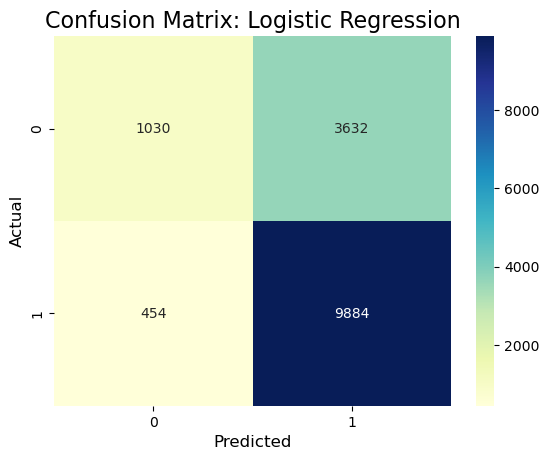

Model  Accuracy  Precision  Recall  F1 score   ROC_AUC
0  Logistic Regression    0.7276     0.7276  0.7276    0.7276  0.711001

In [273]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=42)
lr_y_pred = runModel("Logistic Regression", lr)
lr_eval = EvalMetrics("Logistic Regression", lr, lr_y_pred, cm=True)
lr_eval

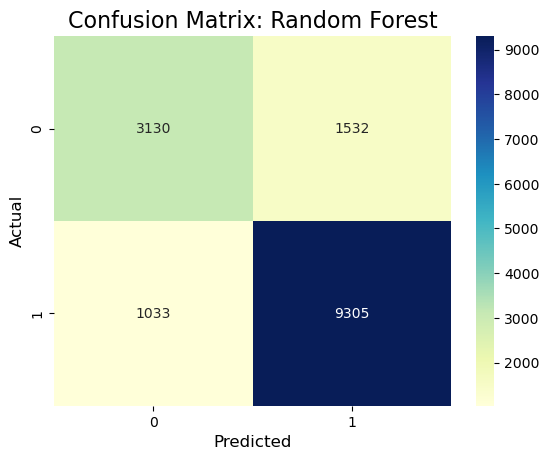

Model  Accuracy  Precision  Recall  F1 score   ROC_AUC
0  Random Forest     0.829      0.829   0.829     0.829  0.894358

In [275]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_y_pred = runModel("Random Forest", rf)
rf_eval = EvalMetrics("Random Forest", rf, rf_y_pred, cm=True)
rf_eval

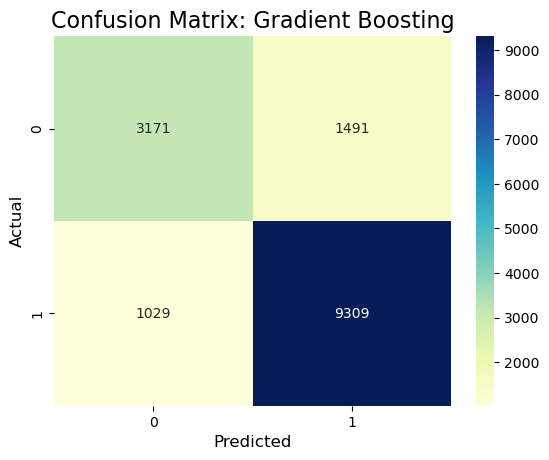

Model  Accuracy  Precision  Recall  F1 score   ROC_AUC
0  Gradient Boosting     0.832      0.832   0.832     0.832  0.899873

In [277]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_y_pred = runModel("Gradient Boosting", gb)
gb_eval = EvalMetrics("Gradient Boosting", gb, gb_y_pred, cm=True)
gb_eval

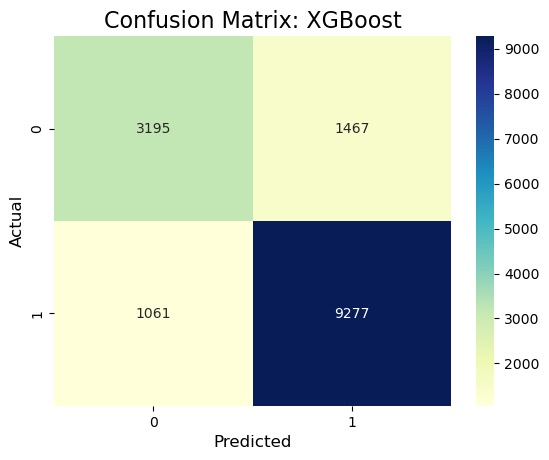

Model  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  XGBoost  0.831467   0.831467  0.831467  0.831467  0.898689

In [279]:
# XGBoost
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')  # For binary classification. Evaluation metric (can be changed)
xgb_y_pred = runModel("XGBoost", xgb)
xgb_eval = EvalMetrics("XGBoost", xgb, xgb_y_pred, cm=True)
xgb_eval

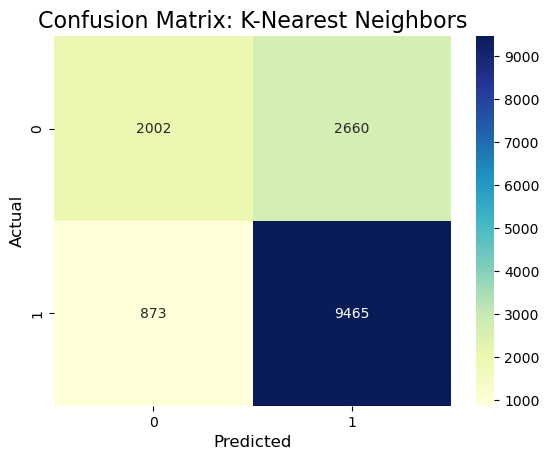

Model  Accuracy  Precision    Recall  F1 score  ROC_AUC
0  K-Nearest Neighbors  0.764467   0.764467  0.764467  0.764467  0.79432

In [339]:
# KNN
knn = KNeighborsClassifier(n_neighbors=11) # adjust n_neighbors
knn_y_pred = runModel("K-Nearest Neighbors", knn)
knn_eval = EvalMetrics("K-Nearest Neighbors", knn, knn_y_pred, cm=True)
knn_eval

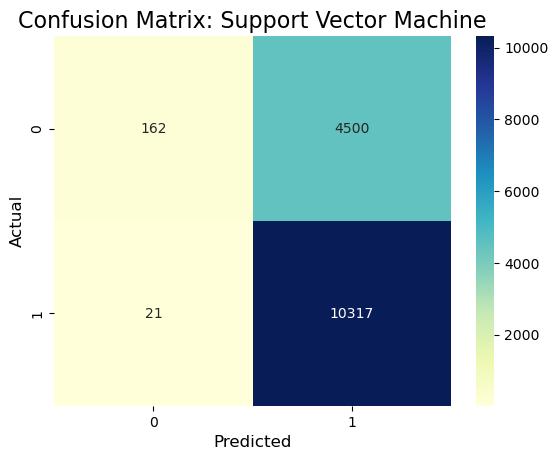

Model  Accuracy  Precision  Recall  F1 score   ROC_AUC
0  Support Vector Machine    0.6986     0.6986  0.6986    0.6986  0.702819

In [283]:
# SVC
svm = SVC(C=1.0, kernel='linear', gamma='auto', probability=True) # 'C' is the regularization parameter (smaller values reduce overfitting), 'kernel' can be 'linear', 'poly', 'rbf', 'sigmoid', etc., 'gamma' controls the influence of individual data points (for RBF kernel)
svm_y_pred = runModel("Support Vector Machine", svm)
svm_eval = EvalMetrics("Support Vector Machine", svm, svm_y_pred, cm=True)
svm_eval

In [285]:
# Compare all evaluation metrics
evaluation_metrics = pd.concat([lr_eval, rf_eval, gb_eval, xgb_eval, knn_eval, svm_eval]) # Stacks df3 below df1
evaluation_metrics.sort_values(by='ROC_AUC', ascending=False)

Model  Accuracy  Precision    Recall  F1 score   ROC_AUC
0       Gradient Boosting  0.832000   0.832000  0.832000  0.832000  0.899873
0                 XGBoost  0.831467   0.831467  0.831467  0.831467  0.898689
0           Random Forest  0.829000   0.829000  0.829000  0.829000  0.894358
0     K-Nearest Neighbors  0.750800   0.750800  0.750800  0.750800  0.777302
0     Logistic Regression  0.727600   0.727600  0.727600  0.727600  0.711001
0  Support Vector Machine  0.698600   0.698600  0.698600  0.698600  0.702819

In [287]:
# List best model based on different metrics
for col in evaluation_metrics.columns:
    evaluation_metrics = evaluation_metrics.sort_values(by=col, ascending=False)
    print("Sort by:", col, evaluation_metrics.iloc[0, 0])

# Note: SVM, Logistic Regression, and Random Forest all have the same scores (except ROC_AUC)

Sort by: Model XGBoost
Sort by: Accuracy Gradient Boosting
Sort by: Precision Gradient Boosting
Sort by: Recall Gradient Boosting
Sort by: F1 score Gradient Boosting
Sort by: ROC_AUC Gradient Boosting


**Model Interpretation**

last_trip_M                -16.088697
days_active                 15.858877
signup_D                     2.345353
last_trip_D                 -2.206960
rating_of_driver_missing    -0.420737
phone_Android               -0.301162
phone_iPhone                -0.234036
avg_dist                    -0.189851
ultimate_black_user          0.189094
signup_weekend              -0.127662
last_trip_weekend           -0.084930
city_Astapor                -0.081108
city_Winterfell              0.080916
rating_by_driver_missing    -0.074562
last_trip_dayofweek         -0.073002
avg_rating_of_driver        -0.051865
surge_pct                    0.051055
signup_dayofweek            -0.045334
avg_rating_by_driver        -0.034926
weekday_pct                  0.023635
avg_surge                   -0.018259
city_King's Landing         -0.005499
signup_M                     0.000000
dtype: float64


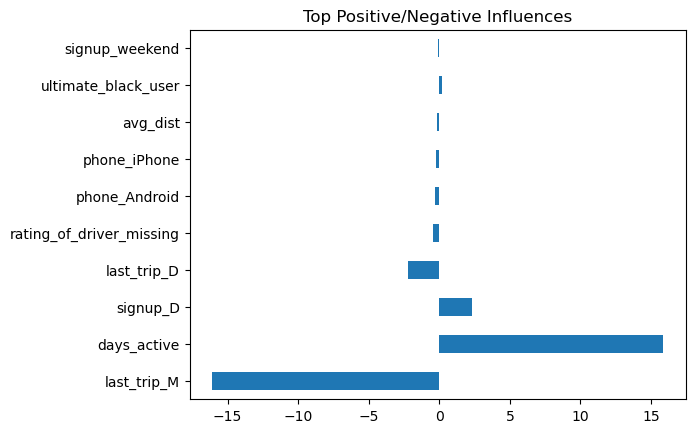

In [289]:
# Examining Logistic Regression coefficients
coefficients = pd.Series(lr.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)
print(coefficients)

coefficients.head(10).plot(kind='barh', title='Top Positive/Negative Influences')
plt.show()

days_active                 0.198728
last_trip_M                 0.111374
weekday_pct                 0.105401
avg_dist                    0.097311
avg_rating_by_driver        0.068966
last_trip_D                 0.063641
signup_D                    0.062114
avg_rating_of_driver        0.044441
surge_pct                   0.041400
signup_dayofweek            0.038327
last_trip_dayofweek         0.035800
avg_surge                   0.033420
rating_of_driver_missing    0.018486
ultimate_black_user         0.015641
city_Winterfell             0.009906
signup_weekend              0.009416
phone_iPhone                0.009300
phone_Android               0.009249
city_Astapor                0.008899
last_trip_weekend           0.008666
city_King's Landing         0.008431
rating_by_driver_missing    0.001080
signup_M                    0.000000
dtype: float64


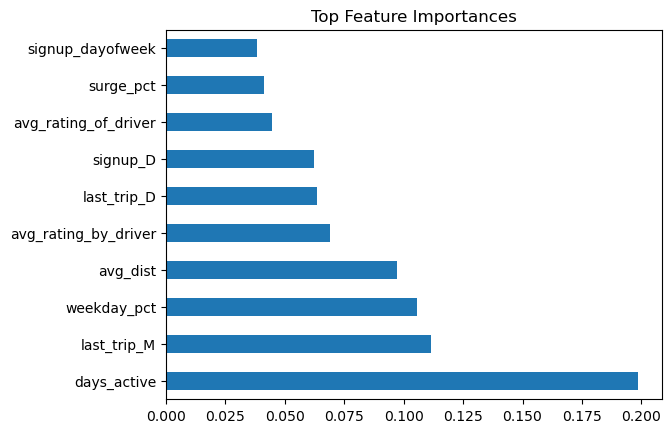

In [291]:
# Examining Random Forest feature importance scores
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)

importances.head(10).plot(kind='barh', title='Top Feature Importances')
plt.show()

**Hyperparameter Tuning**

In [295]:
# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # explore regularization strengths
    'solver': ['liblinear', 'saga']}

lr = LogisticRegression(max_iter=1000)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

C:\Users\yenmi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yenmi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yenmi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yenmi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yenmi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yenmi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

{'C': 100, 'solver': 'liblinear'}
0.7772796269370125


In [307]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
0.8958959995761904


In [315]:
# Hyperparameter tuning for Support Vector Machine
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']  # only matters for 'rbf' kernel
# }

# svc = SVC(probability=True)  # needed for ROC AUC
# grid = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc')
# grid.fit(X_train, y_train)

# print("Best parameters:", grid.best_params_)
# print("Best ROC AUC score:", grid.best_score_)

In [317]:
# Hyperparameter tuning for Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', None]
}

rand_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)
print("Best Parameters:", rand_search.best_params_)
print("Best ROC AUC Score:", rand_search.best_score_)

Best Parameters: {'learning_rate': 0.05679835610086079, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 199, 'subsample': 0.6571467271687763}
Best ROC AUC Score: 0.9003810585148073


**Repeat Modeling and Comparing Evaluation**

In [341]:
# Repeating all models...

# Logistic Regression
lr = LogisticRegression(solver='liblinear', C=100, multi_class='ovr', random_state=42)
lr_y_pred = runModel("Logistic Regression", lr)
lr_eval = EvalMetrics("Logistic Regression", lr, lr_y_pred, cm=False)
lr_eval

# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, max_features='sqrt', min_samples_split=2, random_state=42)
rf_y_pred = runModel("Random Forest", rf)
rf_eval = EvalMetrics("Random Forest", rf, rf_y_pred, cm=False)


# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=199, learning_rate=0.05679835610086079, max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=6, subsample=0.6571467271687763, random_state=42)
gb_y_pred = runModel("Gradient Boosting", gb)
gb_eval = EvalMetrics("Gradient Boosting", gb, gb_y_pred, cm=False)

# XGBoost
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')  # For binary classification. Evaluation metric (can be changed)
xgb_y_pred = runModel("XGBoost", xgb)
xgb_eval = EvalMetrics("XGBoost", xgb, xgb_y_pred, cm=False)

# KNN
knn = KNeighborsClassifier(n_neighbors=6) # adjust n_neighbors
knn_y_pred = runModel("K-Nearest Neighbors", knn)
knn_eval = EvalMetrics("K-Nearest Neighbors", knn, knn_y_pred, cm=False)

# SVC
# svm = SVC(C=10, kernel='linear', gamma='scale', probability=True) # 'C' is the regularization parameter (smaller values reduce overfitting), 'kernel' can be 'linear', 'poly', 'rbf', 'sigmoid', etc., 'gamma' controls the influence of individual data points (for RBF kernel)
# svm_y_pred = runModel("Support Vector Machine", svm)
# svm_eval = EvalMetrics("Support Vector Machine", svm, svm_y_pred, cm=False)

In [343]:
# Compare all evaluation metrics
evaluation_metrics = pd.concat([lr_eval, rf_eval, gb_eval, xgb_eval, knn_eval, svm_eval]) # Stacks df3 below df1
evaluation_metrics.sort_values(by='ROC_AUC', ascending=False)

Model  Accuracy  Precision    Recall  F1 score   ROC_AUC
0       Gradient Boosting  0.834333   0.834333  0.834333  0.834333  0.903117
0                 XGBoost  0.831467   0.831467  0.831467  0.831467  0.898689
0           Random Forest  0.830533   0.830533  0.830533  0.830533  0.898191
0     K-Nearest Neighbors  0.750800   0.750800  0.750800  0.750800  0.777302
0     Logistic Regression  0.743533   0.743533  0.743533  0.743533  0.773203
0  Support Vector Machine  0.698600   0.698600  0.698600  0.698600  0.702819

In [345]:
# List best model based on different metrics
for col in evaluation_metrics.columns:
    evaluation_metrics = evaluation_metrics.sort_values(by=col, ascending=False)
    print("Sort by:", col, evaluation_metrics.iloc[0, 0])

# Note: SVM, Logistic Regression, and Random Forest all have the same scores (except ROC_AUC)

Sort by: Model XGBoost
Sort by: Accuracy Gradient Boosting
Sort by: Precision Gradient Boosting
Sort by: Recall Gradient Boosting
Sort by: F1 score Gradient Boosting
Sort by: ROC_AUC Gradient Boosting


days_active                 86.409325
last_trip_M                -84.514704
last_trip_D                -12.394748
signup_D                    12.305830
rating_of_driver_missing    -0.466969
phone_Android               -0.248621
phone_iPhone                -0.235667
avg_dist                    -0.209293
ultimate_black_user          0.149522
signup_weekend              -0.122233
rating_by_driver_missing    -0.091874
city_Winterfell              0.091334
last_trip_weekend           -0.084815
last_trip_dayofweek         -0.068536
city_King's Landing         -0.062827
avg_rating_of_driver        -0.052098
signup_dayofweek            -0.046842
city_Astapor                -0.043178
surge_pct                    0.041803
avg_rating_by_driver        -0.031167
weekday_pct                  0.021517
avg_surge                   -0.017408
signup_M                     0.000000
dtype: float64


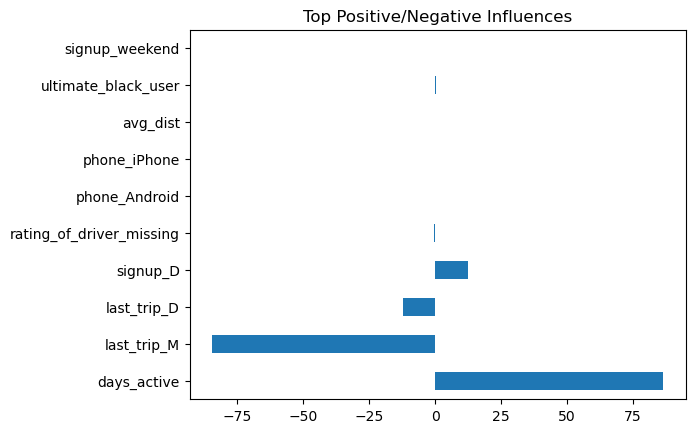

In [347]:
# Examining Logistic Regression coefficients (again)
coefficients = pd.Series(lr.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)
print(coefficients)

coefficients.head(10).plot(kind='barh', title='Top Positive/Negative Influences')
plt.show()

days_active                 0.299449
last_trip_M                 0.200149
weekday_pct                 0.129890
avg_rating_by_driver        0.090897
surge_pct                   0.052711
avg_surge                   0.039623
rating_of_driver_missing    0.032856
avg_dist                    0.030379
avg_rating_of_driver        0.027910
signup_D                    0.019528
last_trip_D                 0.017915
signup_dayofweek            0.014482
last_trip_dayofweek         0.012124
signup_weekend              0.005489
city_Winterfell             0.005469
ultimate_black_user         0.005331
city_King's Landing         0.003710
last_trip_weekend           0.003126
city_Astapor                0.002969
phone_iPhone                0.002245
phone_Android               0.002163
rating_by_driver_missing    0.001584
signup_M                    0.000000
dtype: float64


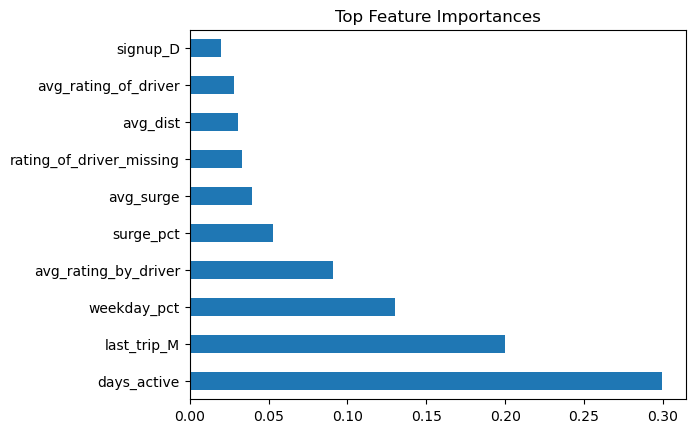

In [351]:
# Examining Random Forest feature importance scores (again)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)

importances.head(10).plot(kind='barh', title='Top Feature Importances')
plt.show()

### Part D: Pre-Processing, Modeling, Evaluation (Long Term Rider Retention)
Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance

In [454]:
df4 = df2.copy()
df4.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  ...  signup_dayofweek  signup_M  signup_D  signup_weekend  \
0         46.2  ...                 5         1        25           False   
1         50.0  ...                 2         1        29            True   
2        100.0  ...                 0         1         6            True   
3         80.0  ...                 4         1        10           False   
4         82.4  ...                 0         1        27            True   

   last_trip_M  last_trip_D  last_trip_dayofweek  last_trip_weekend  \
0            6           17                    1               True   
1            5            5                    0               True   
2            1            7                    1               True   
3            6           29                    6              False   
4            3           15                    5              False   

   rating_of_driver_missing  rating_by_driver_missing  
0                     False                     False  
1                     False                     False  
2                     False                     False  
3                     False                     False  
4                     False                     False  

[5 rows x 24 columns]

In [456]:
df4 = df4.drop(['signup_date', 'last_trip_date'], axis=1)

In [458]:
# Sorting out who has been using the service for at least *X* months
# All of these signed up in January.
df4[df4['days_active']>150] # at least 5 months
# df4[df4['days_active']>180] # at least 6 months

# So we really are trying to predict "long term rider" status based on 'days_active'

df4['long_term_5mo'] = False
df4['long_term_5mo'] = df4['long_term_5mo'].where(df4['days_active']<150, True) # Sets False as default. Sets True for users who have been active for at least 5 months

In [462]:
df4[['days_active', 'long_term_5mo']].sample(10)

days_active  long_term_5mo
23221           26          False
49785          162           True
49566           92          False
31220           98          False
27798           31          False
7150           165           True
29162          177           True
17548           84          False
15968           66          False
39192            3          False

In [464]:
df4_encoded = pd.get_dummies(df4, columns=['city', 'phone']) 

In [466]:
df4_encoded.sample(5)

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
34912                       0              3.700000        1.0        0.0   
13028                       1              5.000000        1.0        0.0   
34048                       0              5.000000        1.0        0.0   
8301                        1              4.601559        1.0        0.0   
25763                       0              4.601559        1.0        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
34912                False         66.7      6.25                   5.0   
13028                 True          0.0      0.73                   5.0   
34048                False        100.0      6.93                   5.0   
8301                 False        100.0      2.93                   5.0   
25763                 True        100.0     12.48                   5.0   

       retained  days_active  ...  last_trip_dayofweek  last_trip_weekend  \
34912     False          139  ...                    5              False   
13028      True          159  ...                    5              False   
34048     False          159  ...                    3               True   
8301       True          113  ...                    4              False   
25763     False          153  ...                    4              False   

       rating_of_driver_missing  rating_by_driver_missing  long_term_5mo  \
34912                     False                     False          False   
13028                     False                     False           True   
34048                     False                     False           True   
8301                       True                     False          False   
25763                      True                     False           True   

       city_Astapor  city_King's Landing  city_Winterfell  phone_Android  \
34912         False                False             True          False   
13028         False                 True            False          False   
34048         False                False             True          False   
8301          False                False             True          False   
25763         False                 True            False          False   

       phone_iPhone  
34912          True  
13028          True  
34048          True  
8301           True  
25763          True  

[5 rows x 26 columns]

In [514]:
X = df4_encoded.drop(['long_term_5mo', 'last_trip_M', 'days_active', 'last_trip_D', 'signup_D'], axis=1)
y = df4_encoded['long_term_5mo']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [516]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

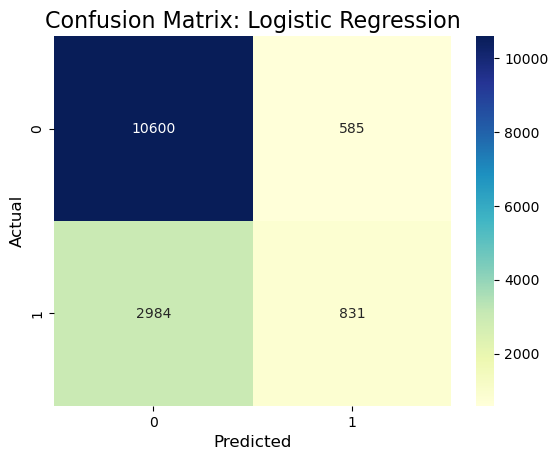

Model  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic Regression  0.762067   0.762067  0.762067  0.762067  0.748915

In [518]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=42)
lr_y_pred = runModel("Logistic Regression", lr)
lr_eval = EvalMetrics("Logistic Regression", lr, lr_y_pred, cm=True)
lr_eval

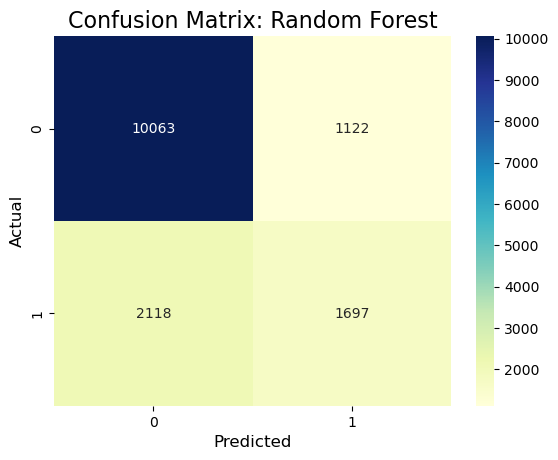

Model  Accuracy  Precision  Recall  F1 score  ROC_AUC
0  Random Forest     0.784      0.784   0.784     0.784  0.80324

In [520]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_y_pred = runModel("Random Forest", rf)
rf_eval = EvalMetrics("Random Forest", rf, rf_y_pred, cm=True)
rf_eval

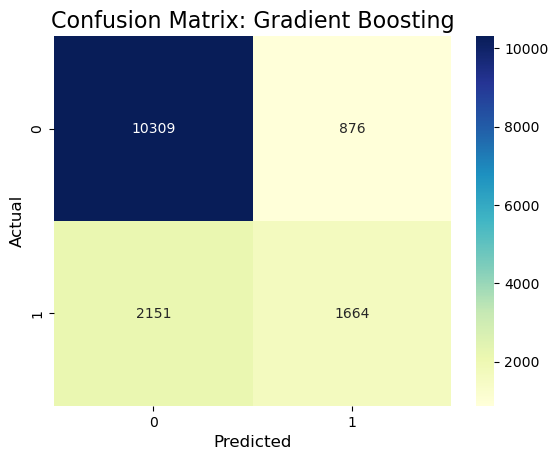

Model  Accuracy  Precision  Recall  F1 score   ROC_AUC
0  Gradient Boosting    0.7982     0.7982  0.7982    0.7982  0.828746

In [522]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_y_pred = runModel("Gradient Boosting", gb)
gb_eval = EvalMetrics("Gradient Boosting", gb, gb_y_pred, cm=True)
gb_eval

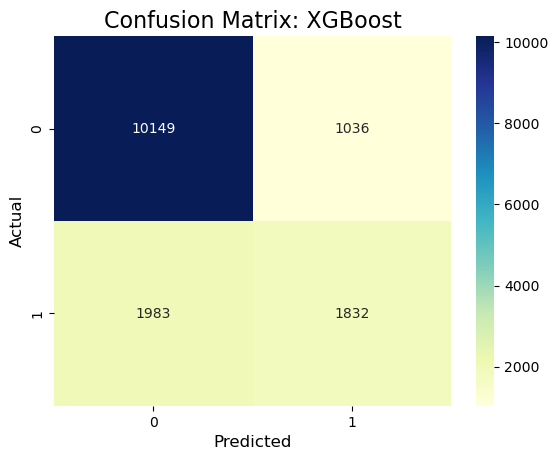

Model  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  XGBoost  0.798733   0.798733  0.798733  0.798733  0.826059

In [523]:
# XGBoost
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')  # For binary classification. Evaluation metric (can be changed)
xgb_y_pred = runModel("XGBoost", xgb)
xgb_eval = EvalMetrics("XGBoost", xgb, xgb_y_pred, cm=True)
xgb_eval

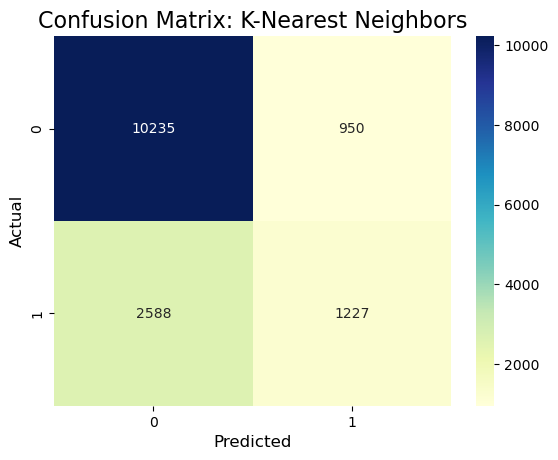

Model  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  K-Nearest Neighbors  0.764133   0.764133  0.764133  0.764133  0.750792

In [524]:
# KNN
knn = KNeighborsClassifier(n_neighbors=6) # adjust n_neighbors
knn_y_pred = runModel("K-Nearest Neighbors", knn)
knn_eval = EvalMetrics("K-Nearest Neighbors", knn, knn_y_pred, cm=True)
knn_eval

In [482]:
# SVC
# svm = SVC(C=1.0, kernel='linear', gamma='auto', probability=True) # 'C' is the regularization parameter (smaller values reduce overfitting), 'kernel' can be 'linear', 'poly', 'rbf', 'sigmoid', etc., 'gamma' controls the influence of individual data points (for RBF kernel)
# svm_y_pred = runModel("Support Vector Machine", svm)
# svm_eval = EvalMetrics("Support Vector Machine", svm, svm_y_pred, cm=True)
# svm_eval

In [528]:
# Compare all evaluation metrics
evaluation_metrics = pd.concat([lr_eval, rf_eval, gb_eval, xgb_eval, knn_eval, svm_eval]) # Stacks df3 below df1
evaluation_metrics.sort_values(by='ROC_AUC', ascending=False)

Model  Accuracy  Precision    Recall  F1 score   ROC_AUC
0       Gradient Boosting  0.798200   0.798200  0.798200  0.798200  0.828746
0                 XGBoost  0.798733   0.798733  0.798733  0.798733  0.826059
0           Random Forest  0.784000   0.784000  0.784000  0.784000  0.803240
0     K-Nearest Neighbors  0.764133   0.764133  0.764133  0.764133  0.750792
0     Logistic Regression  0.762067   0.762067  0.762067  0.762067  0.748915
0  Support Vector Machine  0.698600   0.698600  0.698600  0.698600  0.702819

In [530]:
# List best model based on different metrics
for col in evaluation_metrics.columns:
    evaluation_metrics = evaluation_metrics.sort_values(by=col, ascending=False)
    print("Sort by:", col, evaluation_metrics.iloc[0, 0])

# Note: SVM, Logistic Regression, and Random Forest all have the same scores (except ROC_AUC)

Sort by: Model XGBoost
Sort by: Accuracy XGBoost
Sort by: Precision XGBoost
Sort by: Recall XGBoost
Sort by: F1 score XGBoost
Sort by: ROC_AUC Gradient Boosting


trips_in_first_30_days      0.405379
ultimate_black_user         0.335679
rating_of_driver_missing   -0.305496
city_King's Landing         0.290060
phone_iPhone                0.269602
last_trip_dayofweek        -0.239452
city_Astapor               -0.237628
last_trip_weekend          -0.224872
avg_dist                   -0.191599
phone_Android              -0.161720
retained                   -0.139980
surge_pct                   0.083137
signup_weekend              0.077014
avg_rating_by_driver       -0.055465
signup_dayofweek            0.055117
rating_by_driver_missing   -0.053806
weekday_pct                -0.035716
avg_rating_of_driver       -0.014521
avg_surge                  -0.012782
city_Winterfell            -0.009605
signup_M                    0.000000
dtype: float64


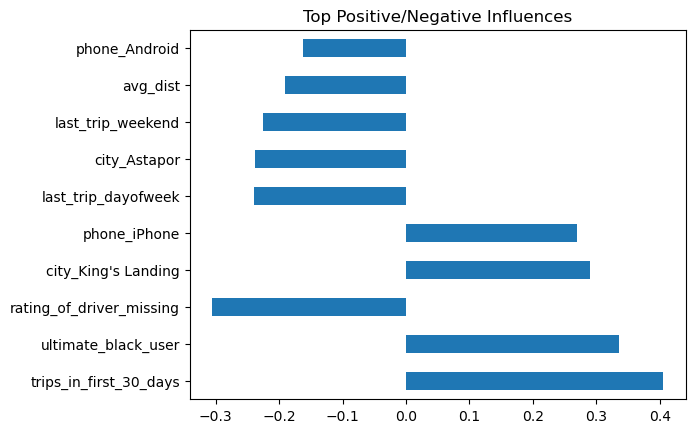

In [532]:
# Examining Logistic Regression coefficients
coefficients = pd.Series(lr.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)
print(coefficients)

coefficients.head(10).plot(kind='barh', title='Top Positive/Negative Influences')
plt.show()

avg_dist                    0.193706
weekday_pct                 0.122629
avg_rating_by_driver        0.095070
surge_pct                   0.085332
avg_rating_of_driver        0.074835
signup_dayofweek            0.070947
avg_surge                   0.070308
trips_in_first_30_days      0.070167
last_trip_dayofweek         0.064345
ultimate_black_user         0.026925
city_King's Landing         0.023831
phone_Android               0.014673
signup_weekend              0.014073
phone_iPhone                0.014016
city_Astapor                0.013966
last_trip_weekend           0.013744
retained                    0.011750
city_Winterfell             0.010502
rating_of_driver_missing    0.008456
rating_by_driver_missing    0.000727
signup_M                    0.000000
dtype: float64


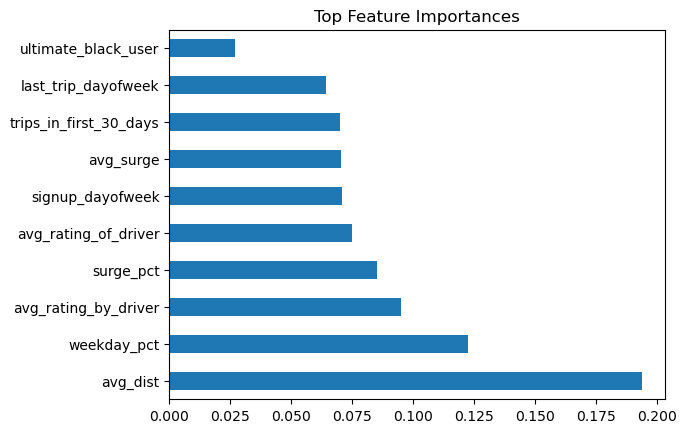

In [534]:
# Examining Random Forest feature importance scores
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)

importances.head(10).plot(kind='barh', title='Top Feature Importances')
plt.show()

In [542]:
# Cross validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define multiple scorers
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Run CV
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Print results
for metric in scoring:
    mean = np.mean(cv_results[f'test_{metric}'])
    std = np.std(cv_results[f'test_{metric}'])
    print(f"{metric.capitalize():<10}: {mean:.4f} ± {std:.4f}")

Accuracy  : 0.7994 ± 0.0034
Precision : 0.6425 ± 0.0112
Recall    : 0.4765 ± 0.0039
F1        : 0.5471 ± 0.0050
Roc_auc   : 0.8263 ± 0.0056
